In [2]:
packageVersion("monocle3")
rm(list = ls())  # Clear the environment
options(warn=-1) # Turn off warning message globally
library("monocle3") # Load Monocle
library("Biobase")
library("Seurat")
library("ggplot2")
library("xlsx")

[1] ‘0.2.3.0’

Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; vie


# subsetting cells and genes

In [3]:
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")
P23M<-readRDS(file ="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P23M.rds")
P35M<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P35M.rds")
AM<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/AM.rds")
Cast<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/Cast.rds")
P23F<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P23F.rds")
P35F<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P35F.rds")
AF<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/AF.rds")
OVX<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/OVX.rds")

In [4]:
new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)

In [5]:
#identifying cluster barcodes in each condition
# exp. Oligo_1_barcode_ctrl gives all barcodes in it
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
assign(paste(new.ident[i],"_barcode_P23M",sep=""),intersect(colnames(P23M@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_P35M",sep=""),intersect(colnames(P35M@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_AM",sep=""),intersect(colnames(AM@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_Cast",sep=""),intersect(colnames(Cast@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_P23F",sep=""),intersect(colnames(P23F@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_P35F",sep=""),intersect(colnames(P35F@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_AF",sep=""),intersect(colnames(AF@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_OVX",sep=""),intersect(colnames(OVX@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
}

In [6]:
#hormone rich
#Hormone_rich<-c(Vgat2_barcode,Vgat4_barcode,Vgat16_barcode)
Hormone_rich<-c(Vgat2_barcode,Vgat4_barcode,Vgat16_barcode)

In [7]:
Vgat_barcode_P23F<-intersect(rownames(P23F@meta.data),Hormone_rich)
Vgat_barcode_P23M<-intersect(rownames(P23M@meta.data),Hormone_rich)
Vgat_barcode_Cast<-intersect(rownames(Cast@meta.data),Hormone_rich)
Vgat_barcode_OVX<-intersect(rownames(OVX@meta.data),Hormone_rich)
Vgat_barcode_P35F<-intersect(rownames(P35F@meta.data),Hormone_rich)
Vgat_barcode_AF<-intersect(rownames(AF@meta.data),Hormone_rich)
Vgat_barcode_P35M<-intersect(rownames(P35M@meta.data),Hormone_rich)
Vgat_barcode_AM<-intersect(rownames(AM@meta.data),Hormone_rich)

In [8]:
celltype<-vector()
conditiontype<-vector()
for (i in 1:dim(MPOA.integrated@meta.data)[1]){
    celltype[i]<-new.ident[as.numeric(MPOA.integrated@meta.data$integrated_snn_res.0.8[i])]
    conditiontype[i]<-paste(MPOA.integrated@meta.data$stim[i],celltype[i],sep="")
}
MPOA.integrated@meta.data$celltype<-celltype
MPOA.integrated@meta.data$conditiontype<-conditiontype

In [9]:
#order is important
merge_all<-subset(x =MPOA.integrated, cells=c(Vgat_barcode_P23M,Vgat_barcode_P35M,Vgat_barcode_AM,Vgat_barcode_Cast,Vgat_barcode_P23F,Vgat_barcode_P35F,Vgat_barcode_AF,Vgat_barcode_OVX))


In [10]:
celltype<-vector()
conditiontype<-vector()
for (i in 1:dim(merge_all@meta.data)){
    k<-grep(rownames(merge_all@meta.data)[i],rownames(MPOA.integrated@meta.data))
    celltype[i]<-MPOA.integrated$celltype[k]
    conditiontype[i]<-MPOA.integrated$conditiontype[k]
}
merge_all@meta.data$celltype<-celltype
merge_all@meta.data$conditiontype<-conditiontype

In [11]:
# or
merge_all@meta.data$stim<-factor(merge_all@meta.data$stim,levels=rev(c("P23M","P23F","Cast","OVX","P35F","P35M","AF","AM")))
merge_all@meta.data$celltype<-factor(merge_all@meta.data$celltype,levels=c("Vgat2","Vgat4","Vgat16"))

using DEGs generated using log data

In [12]:
#male 100, female 40
male_dimorphic<-readRDS("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/Esr1_regulated_male_dimorphic_gene.rds")
female_dimorphic<-readRDS("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/Esr1_regulated_female_dimorphic_gene.rds")
remove<-c("Ddx3y","Eif2s3y","Uty","Xist")
#remove<-c("Ddx3y","Eif2s3y","Uty")
#male 50 female 30
library(xlsx)
gene_list<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AM_over_AF/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)     
if(dim(gene_list)[1]>10){gene_list<-gene_list[order(gene_list[,"p_val_adjust"]),][1:100,]}else{
    gene_list<-gene_list
}

unique_gene1<-unique(c(as.character(gene_list[,1])))
#unique_gene1<-unique_gene1[!(unique_gene1 %in% common)]
unique_gene1<-unique_gene1[!(unique_gene1 %in% remove)]
unique_gene1<-intersect(male_dimorphic,unique_gene1)

gene_list<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AF_over_AM/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)     
if(dim(gene_list)[1]>10){gene_list<-gene_list[order(gene_list[,"p_val_adjust"]),][1:40,]}else{
    gene_list<-gene_list
}

unique_gene2<-unique(c(as.character(gene_list[,1])))
#unique_gene2<-unique_gene2[!(unique_gene2 %in% common)]

unique_gene2<-intersect(female_dimorphic,unique_gene2)

unique_gene<-unique(c(unique_gene1,unique_gene2))


In [15]:
temp_all<-subset(x=merge_all,cells= rownames(subset(merge_all@meta.data,stim=="AM"|stim=="AF")))

In [48]:
#for svm
expression<-t(as.matrix(temp_all@assays$RNA@data[unique_gene,]))
for(i in 1:length(unique_gene)){
    temp_all@meta.data[,unique_gene[i]]<-expression[,unique_gene[i]]
}
metadata<- temp_all@meta.data
metadata$group<-metadata$stim

In [49]:
write.xlsx2(metadata,file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/dimorphism/Esr1_3/svm/metadata_p50.xlsx"))

In [18]:
unique_gene

[1] "Ppia"          "Vsnl1"         "Rtn3"          "Chst2"        
 [5] "Actg1"         "Abat"          "Prkcb"         "A830018L16Rik"
 [9] "Cdh4"          "Gnai1"         "Acvr1c"        "Maf"          
[13] "Dgkb"          "Scg2"          "Tead1"         "Socs2"        
[17] "Fam46a"        "Bcl11a"        "Rap1gap"       "Mtpn"         
[21] "Ptprk"         "Plekhb1"       "Il1rapl2"      "Slc18a2"      
[25] "Zfpm2"         "Tmem158"       "Lrfn5"         "Negr1"

In [22]:
#for MELD

expression<-t(as.matrix(merge_all@assays$RNA@data[unique_gene,]))
for(i in 1:length(unique_gene)){
    merge_all@meta.data[,unique_gene[i]]<-expression[,unique_gene[i]]
}
metadata<- merge_all@meta.data
metadata$group<-metadata$stim
Condition<-numeric()
for(i in 1:dim(metadata)[1]){
   if(metadata$group[i]=="AM"  ) {
       Condition[i]<-"male"
   }else if ( metadata$group[i]=="AF"  ) {
       Condition[i]<-"female"
   }else{
       Condition[i]<-"intermediate"
   }
}
metadata$Condition<-Condition
write.xlsx2(metadata,file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/dimorphism/Esr1_3/metadata_MELD.xlsx"))


# make monocle object

In [52]:
GTF <- read.table(file='/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/features.tsv')
colnames(GTF)<-c("id","gene_short_name","gene_expression")
common<-intersect(GTF$gene_short_name,rownames(merge_all@assays$RNA@data))

In [53]:
unique_gene[!(unique_gene %in% common)]

character(0)

In [54]:
GTF<-GTF[GTF$gene_short_name %in% common, ]
merge_all@assays$RNA@counts<-merge_all@assays$RNA@counts[common, ]
GTF<-GTF[!duplicated(GTF$gene_short_name),]

In [55]:
rownames(GTF)<-GTF$gene_short_name

In [56]:
#210304 Esr1_3 using dim 10
merge_all_m <-new_cell_data_set(as.matrix(merge_all@assays$RNA@counts), cell_metadata =merge_all@meta.data,gene_metadata = GTF)
merge_all_m  <- preprocess_cds(merge_all_m ,  num_dim =10,use_genes=unique_gene)
#merge_all_m  <- preprocess_cds(merge_all_m ,  num_dim =20)
merge_all_m <- reduce_dimension(merge_all_m,reduction_method = "UMAP",preprocess_method = 'PCA')

In [57]:
merge_all_m  <- cluster_cells(merge_all_m )

In [58]:
merge_all_m <- learn_graph(merge_all_m,use_partition = FALSE)


  |======================================================================| 100%


In [59]:
cell_type_color <- rev(c("P23M"= "#C6D0EA","P35M"="#485CAA","Cast"= "#6C97CF","P23F"= "#EFBEB0","P35F"= "#BC2B2A","AF"="#711111","OVX"= "#F37466","AM" = "#282461"))

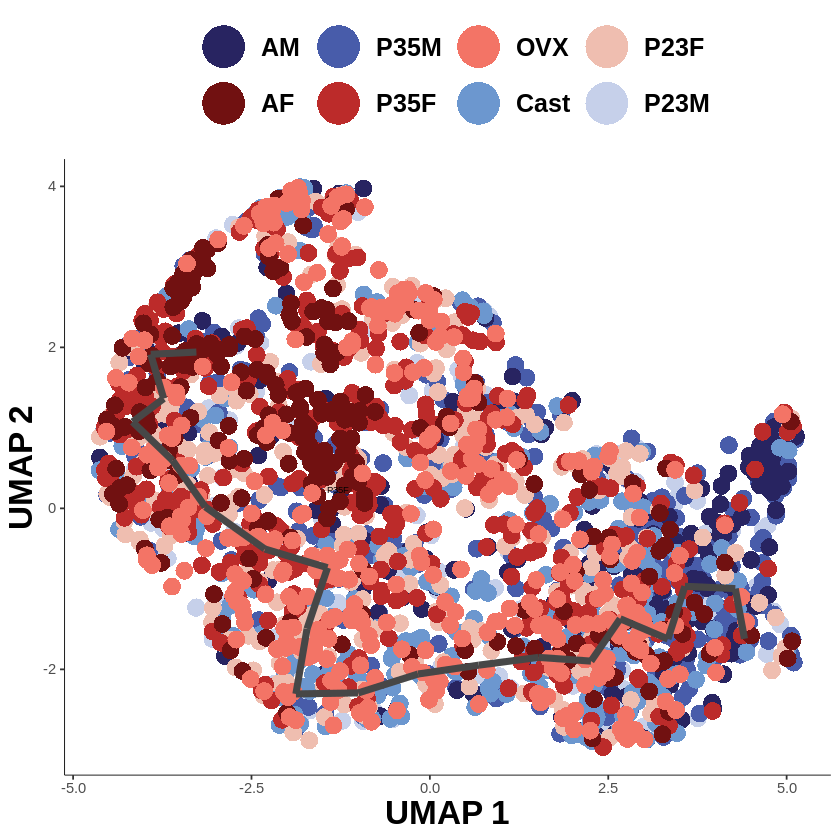

In [60]:
plot_cells(merge_all_m,
           color_cells_by = "stim",cell_size =5,alpha = 1,label_cell_groups = TRUE,trajectory_graph_segment_size = 2,label_roots = FALSE,
           label_leaves=FALSE,cell_stroke = I(0/2),
           label_branch_points=FALSE)+
                     scale_color_manual(values = cell_type_color)+ guides(colour = guide_legend(override.aes = list(size=12)))+theme(title=element_text(size=20,angle=0,face="bold"),strip.text = element_text(size = 40,face="bold")
    ,legend.title=element_blank(), legend.text=element_text(size =15,face="bold") ,legend.position ="top")
#ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/dimorphism/Esr1_3/trajectory_stim_male_VgatEsr1_15dim_color_combinethick_2gene_sizse5_1.pdf",width=10,height=9)

In [61]:
get_earliest_principal_node <- function(merge_all_m, stim="AM"){
  cell_ids <- which(colData(merge_all_m)[, "stim"] == stim)
  
  closest_vertex <-
  merge_all_m@principal_graph_aux[["UMAP"]]$pr_graph_cell_proj_closest_vertex
  closest_vertex <- as.matrix(closest_vertex[colnames(merge_all_m), ])
  root_pr_nodes <-
  igraph::V(principal_graph(merge_all_m)[["UMAP"]])$name[as.numeric(names
  (which.max(table(closest_vertex[cell_ids,]))))]
  
  root_pr_nodes
}
merge_all_m<- order_cells(merge_all_m, root_pr_nodes=get_earliest_principal_node(merge_all_m))

In [62]:
get_earliest_principal_node(merge_all_m)

[1] "Y_6"

In [63]:
pseudotime<-numeric()
for (i in 1:length(merge_all_m@ principal_graph_aux$UMAP$pseudotime)){
    pseudotime[i]<-merge_all_m@ principal_graph_aux$UMAP$pseudotime[[i]]
}

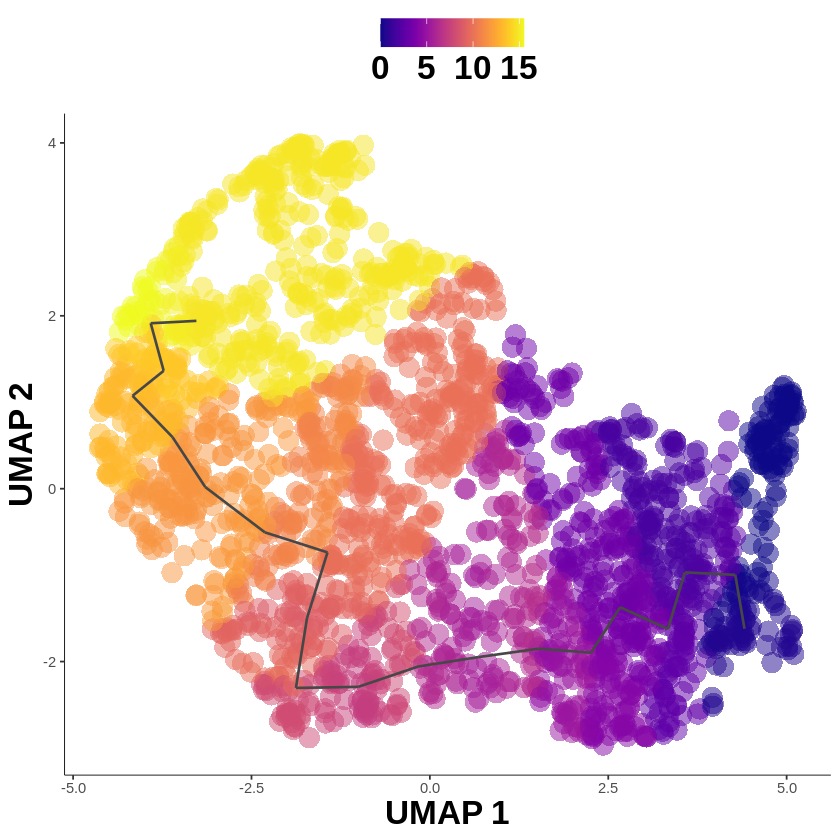

In [64]:
plot_cells(merge_all_m,
           color_cells_by = "pseudotime",cell_size =6,alpha = 0.5,label_cell_groups = FALSE,trajectory_graph_segment_size = 0.75,label_roots = FALSE,
           label_leaves=FALSE,cell_stroke = I(0/2),
           label_branch_points=FALSE)+
theme(title=element_text(size=20,angle=0,face="bold"),strip.text = element_text(size = 40,face="bold")
    ,legend.title=element_blank(), legend.text=element_text(size = 20,face="bold") ,legend.position ="top")
#ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/dimorphism/Esr1_3/trajectory_psedutime_male_VgatEsr1_15dim_color.pdf",width=10,height=9)

In [65]:
saveRDS(merge_all_m,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/dimorphism/Esr1_3/Vgat_Esr1_10_merge_all_m.rds")

# Heatmap DEGs along trajectory

In [66]:
male<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AM_over_AF/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)[,1]  
female<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AF_over_AM/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)[,1]
gene_list<-unique(c(as.character(male),as.character(female)))

In [67]:
max(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime)

[1] 15.51257

In [68]:
max(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime)

[1] 15.51257

In [69]:
spacing<-10
Pseudotime<-seq(0, ceiling(max(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime)), by=ceiling(max(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime))/spacing)
Pseudotime<-Pseudotime[1:spacing]

In [70]:
length(Pseudotime)

[1] 10

In [71]:
int<-Pseudotime[2]-Pseudotime[1]

In [73]:
#201113
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)
max_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(Pseudotime)

Cell_number_t<- data.frame("cluster" =Pseudotime, "gene"=(rep(gene_list[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(Pseudotime)){
barcode<-names(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime)[Pseudotime[p]< merge_all_m@principal_graph_aux@listData$UMAP$pseudotime &  merge_all_m@principal_graph_aux@listData$UMAP$pseudotime<Pseudotime[p]+int]
Cell_number_t$avg[p]<-(mean(merge_all@assays$RNA@data[gene_list[i],barcode])-mean(merge_all@assays$RNA@data[gene_list[i],]))/sd(merge_all@assays$RNA@data[gene_list[i],])
}
Cell_number<-rbind(Cell_number_t,Cell_number)
max_number_t<-subset(Cell_number_t,Cell_number_t$avg==max(Cell_number_t$avg))
max_number<-rbind(max_number_t,max_number)    
}
#Cell_number$Pseudotime<-factor(Cell_number$Pseudotime,levels=Pseudotime)

In [74]:
max_number_sort<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)
for (i in 1:length(Pseudotime)){
    temp<-subset(max_number,cluster==Pseudotime[i])
    temp<-temp[order(temp$avg),]
    max_number_sort<-rbind(max_number_sort,temp)}

In [75]:
length(unique(max_number_sort$gene))

[1] 155

In [76]:
Cell_number$cluster<-factor(Cell_number$cluster,levels=Pseudotime)

In [77]:
#Cell_number$gene<-factor(Cell_number$gene,levels=gene_list)
Cell_number$gene<-factor(Cell_number$gene,levels=rev(unique(max_number_sort$gene)))

In [78]:
library("scales")

In [79]:
temp_gene<-rev(unique(max_number_sort$gene))

In [80]:
gene<-unique_gene

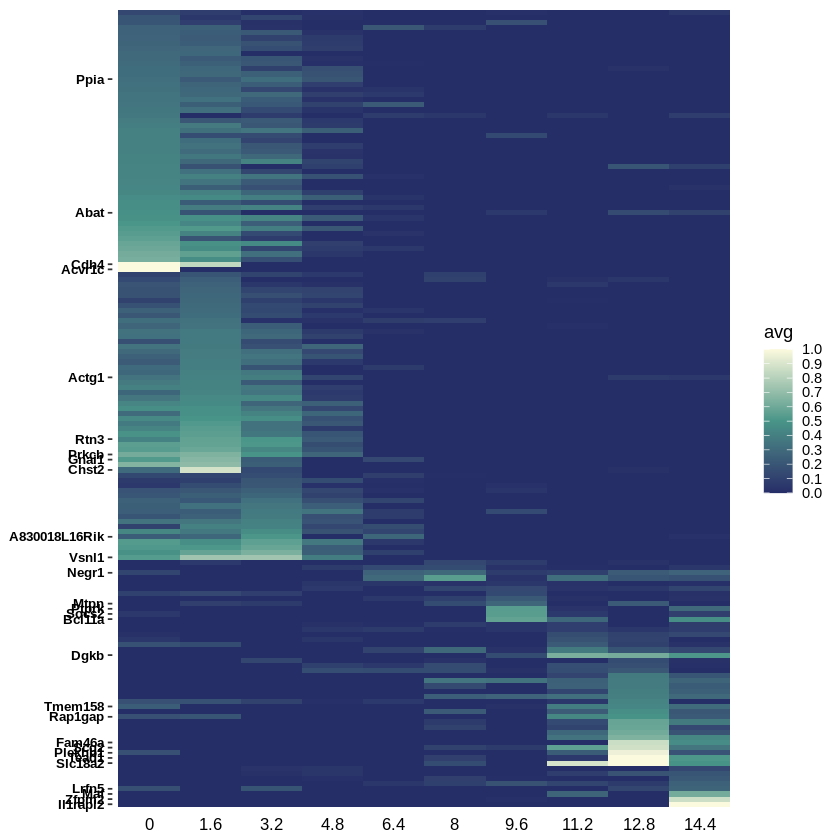

In [82]:
high_C<-"#FCFADE"
middle_C<-"#489588"
low_C<-"#262E68"
low<- 0
high<- 1
p<-ggplot(data = Cell_number, mapping = aes(x = cluster, y = gene,fill =avg,label=gene)) + scale_y_discrete(breaks=c(gene))+
  geom_tile() +  scale_fill_gradient2(limits=c(low, high), breaks=seq(low,high,by=0.1),low = low_C,mid=middle_C,high =high_C,  midpoint = 0.5,oob=squish)  #scale_fill_continuous(limits=c(low, high), breaks=seq(low,high,by=0.2),low = "black",high = "yellow", oob=squish)
pp<-p+ylab("gene")+xlab("psedutime")+theme(axis.text.y=element_text(size=8, colour = "black",face="bold"),axis.text.x=element_text(size=10,angle = 0, hjust =0.5,vjust=0.3,colour = "black"),axis.title=element_blank(),plot.title = element_blank(),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line.x = element_line(colour = "white", size = 0),axis.ticks.x = element_blank())+ggtitle("heatmap marker gene")
print(pp)
ggsave(file=paste(text="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/dimorphism/Esr1_3/dimorphic_DEG_heatmap_light_DEGtrajectory_15_BL_correcty_",low,"_",high,"color_adjusted.pdf"),width=7,height=10)

# proportion of each group along Pseudotime

In [419]:
spacing<-10
Pseudotime<-seq(0, ceiling(max(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime)), by=ceiling(max(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime))/spacing)
Pseudotime<-Pseudotime[1:spacing]

In [420]:
group<-c("AM","P35M","Cast","P23M","P23F","OVX","P35F","AF")

In [421]:
int<-Pseudotime[2]-Pseudotime[1]

In [422]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(group)){
L<-length(Pseudotime)

Cell_number_t<- data.frame("cluster" =Pseudotime, "group"=(rep(group[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(Pseudotime)){
barcode<-names(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime)[Pseudotime[p]< merge_all_m@principal_graph_aux@listData$UMAP$pseudotime &  merge_all_m@principal_graph_aux@listData$UMAP$pseudotime<Pseudotime[p]+int]
Cell_number_t$proportion[p]<-100*sum(grepl(group[i],barcode))/dim(subset(merge_all@meta.data,stim==group[i]))[1]}
Cell_number<-rbind(Cell_number_t,Cell_number)}

In [423]:
Cell_number$group<-factor(Cell_number$group,levels=rev(group))

In [424]:
Cell_number$cluster<-factor(Cell_number$cluster,levels=Pseudotime)

In [425]:
library(scales)

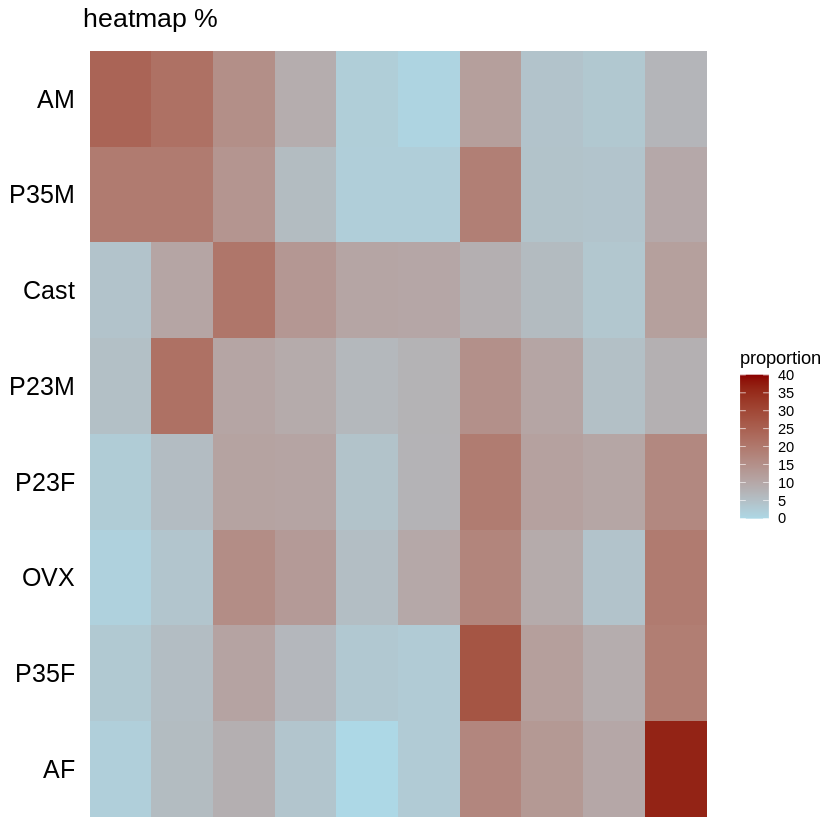

In [426]:
low<-0
high<-40
p<-ggplot(data = Cell_number, mapping = aes(x = cluster, y = group,fill =proportion)) +
  geom_tile() + scale_fill_continuous(limits=c(low, high), breaks=seq(low,high,by=5),low = "lightblue",high = "darkred", oob=squish)
pp<-p+ylab("proportion %")+xlab("psedutime")+theme(axis.text.y=element_text(size=15, colour = "black"),axis.text.x=element_blank(),axis.title=element_blank(),plot.title = element_text(size=16),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "white", size = 0),axis.ticks.y = element_blank(),axis.ticks.x = element_blank())+ggtitle("heatmap %")
print(pp)
ggsave(file=paste(text="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/dimorphism/Esr1_3/group_proportion_heatmap_lightint",low,"_",high,".pdf"),width=10,height=2)

In [430]:
# scatter plot of M vs F and M vs KO and Esr1 regulation

In [8]:
regulated_male_dimorphic<-readRDS("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/Esr1_regulated_male_dimorphic_gene.rds")
regulated_female_dimorphic<-readRDS("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/Esr1_regulated_female_dimorphic_gene.rds")

In [9]:
AM_AF<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AM_over_AF/All_gene.xlsx",sheetIndex=1) 
AM_KO<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/DEG/All_gene.xlsx",sheetIndex=1)  
common<-intersect(AM_AF[,1],AM_KO[,1])

In [10]:
rownames(AM_AF)<-AM_AF[,1]
rownames(AM_KO)<-AM_KO[,1]
AM_AF<-AM_AF[common,]
rownames(AM_KO)<-AM_KO[,1]
AM_KO<-AM_KO[common,]
for(i in 1:dim(AM_AF)[1]){if(AM_AF$p_val_adjust[i]>1){
    AM_AF$p_val_adjust[i]<-1
}}
for(i in 1:dim(AM_KO)[1]){if(AM_KO$p_val_adjust[i]>1){
    AM_KO$p_val_adjust[i]<-1
}}

In [11]:
AM_KO$mlog<- -log(AM_KO$p_val_adjust)
AM_AF$mlog<- -log(AM_AF$p_val_adjust)
AM_AF$KO_logp<-AM_KO$mlog

In [12]:
AF_AM<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AF_over_AM/All_gene.xlsx",sheetIndex=1) 
AF_KO<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/DEG/All_gene.xlsx",sheetIndex=1)  
common<-intersect(AF_AM[,1],AF_KO[,1])

In [481]:
rownames(AF_AM)<-AF_AM[,1]
rownames(AF_KO)<-AF_KO[,1]
AF_AM<-AF_AM[common,]
rownames(AF_KO)<-AF_KO[,1]
AF_KO<-AF_KO[common,]
for(i in 1:dim(AF_AM)[1]){if(AF_AM$p_val_adjust[i]>1){
    AF_AM$p_val_adjust[i]<-1
}}
for(i in 1:dim(AF_KO)[1]){if(AF_KO$p_val_adjust[i]>1){
    AF_KO$p_val_adjust[i]<-1
}}

In [482]:
AF_KO$mlog<- -log(AF_KO$p_val_adjust)
AF_AM$mlog<- -log(AF_AM$p_val_adjust)
AF_AM$KO_logp<-AF_KO$mlog

In [483]:
common<-intersect(AF_AM[,1],AM_AF[,1])
AF_AM<-AF_AM[common,]
AM_AF<-AM_AF[common,]

In [484]:
sum(AM_AF$avg_logFC>0)
sum(AF_AM$avg_logFC>0)
sum(AF_AM$avg_logFC>0)+sum(AM_AF$avg_logFC>0)

[1] 7116

[1] 8069

[1] 15185

In [485]:
AM_AF<-subset(AM_AF,avg_logFC>0)
AF_AM<-subset(AF_AM,avg_logFC>0)
AF_AM$avg_logFC<- -AF_AM$avg_logFC
AF_AM$mlog<- -AF_AM$mlog

In [486]:
Combine<-rbind(AM_AF,AF_AM)

In [503]:
regulated_male_dimorphic

[1] "Pcdh17"        "Eif4g3"        "Stim2"         "Lrrfip2"      
  [5] "Ppia"          "Kcnb1"         "Ppid"          "Pitpnc1"      
  [9] "Nuak1"         "Cbx4"          "Vsnl1"         "Arhgap36"     
 [13] "Rbfox3"        "Gria3"         "Pcp4l1"        "Pwwp2a"       
 [17] "Ncor1"         "Bbip1"         "Mrpl33"        "Robo2"        
 [21] "Zfyve9"        "Zadh2"         "Cbx4"          "Plekha7"      
 [25] "Tbca"          "Adra2a"        "Atp2b1"        "Tmem215"      
 [29] "Stim2"         "Sytl4"         "Sacs"          "Gria3"        
 [33] "Ppia"          "Hnrnpa3"       "Ankrd13c"      "Ggps1"        
 [37] "Ephb1"         "Rtn3"          "Ift81"         "Chst2"        
 [41] "Pfdn4"         "Sacm1l"        "Ezr"           "Tmem150c"     
 [45] "Ppid"          "Ncor1"         "Kif2a"         "Psmc6"        
 [49] "Wwp1"          "Tnr"           "Zfp385b"       "Stt3b"        
 [53] "Scd1"          "Robo2"         "Zfyve9"        "Mrps36"       
 [57] "Fam69a"        "Zfp74"         "Vsnl1"         "Gad2"         
 [61] "Cox5a"         "Actg1"         "Abat"          "Prkcb"        
 [65] "Atp2b1"        "A830018L16Rik" "Cdh4"          "Gnai1"        
 [69] "Nudt4"         "Sacs"          "Lrrfip2"       "Hcn1"         
 [73] "Atxn2"         "Hspa8"         "Sec61g"        "Hnrnpa3"      
 [77] "Ywhab"         "Cckar"         "Pcp4l1"        "Cox8a"        
 [81] "Ift81"         "Shisa6"        "Dync1li1"      "Pfdn4"        
 [85] "Rala"          "Plcb1"         "Kcnb1"         "Tmem150c"     
 [89] "Commd3"        "Pim3"          "Ncam2"         "Stk39"        
 [93] "Hars"          "Armcx4"        "Pcbd1"         "Elovl5"       
 [97] "Wwp1"          "Zc3h14"        "Zfp385b"       "Clstn2"       
[101] "Bnip3"         "Tmem167"       "Hspa9"         "Cstf2"        
[105] "Mrps36"        "Lrrn3"         "Exoc4"         "Pou6f2"       
[109] "Zfp74"         "Adra2a"        "Enpp2"         "Pfdn4"        
[113] "Dnajc15"       "Tmeff1"        "Bnip3"         "Exoc4"        
[117] "Sec61g"        "Armcx4"        "Bnip3"         "Cstf2"        
[121] "Vsnl1"         "Eif4g3"        "Glra2"         "Vldlr"        
[125] "Acvr1c"        "Ndufs4"        "Zfp385b"

In [510]:
!(TRUE)

[1] FALSE

In [509]:
!(Combine[5,1] %in% regulated_male_dimorphic)

[1] TRUE

In [515]:
color<-numeric()
size<-numeric()
for(i in 1:dim(Combine)[1]){
    if(Combine$KO_logp[i]> -log(0.05) & Combine$mlog[i]> -log(0.05) & Combine[i,1] %in% regulated_male_dimorphic){
        color[i]<-"darkblue"
        size[i]<-3
    } else if(Combine$KO_logp[i]> -log(0.05) & Combine$mlog[i]< log(0.05) & Combine[i,1] %in% regulated_female_dimorphic){
        color[i]<-"salmon"
        size[i]<-3
    }else if(Combine$KO_logp[i]> -log(0.05) & Combine$mlog[i]> -log(0.05) & !(Combine[i,1] %in% regulated_male_dimorphic)){
        color[i]<-"black"
        size[i]<-2
    }else if(Combine$KO_logp[i]> -log(0.05) & Combine$mlog[i]> log(0.05) & !(Combine[i,1] %in% regulated_female_dimorphic)){
        color[i]<-"black"
        size[i]<-2
    }else{
        color[i]<-"black"
        size[i]<-1
    }
}

In [489]:
saveRDS(Combine,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/dimorphism/Esr1_3/combine_data_intKOp_dimorphicp.rds")

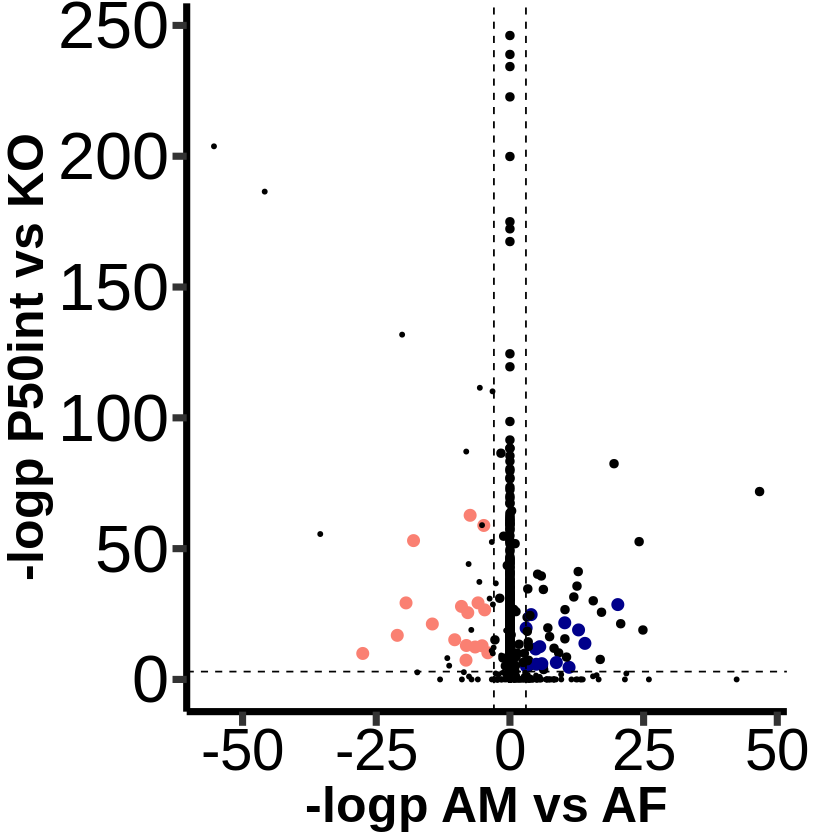

In [517]:
ggplot(Combine,aes(x=mlog,y=KO_logp))+geom_point(size=size,color=color) +xlab("-logp AM vs AF")+ylab("-logp P50int vs KO")+theme(axis.text.x=element_text(size=35, hjust = 0.5,colour = "black"),axis.text.y=element_text(size=40, hjust = 1,colour = "black"),axis.title.y=element_text(size=30,face="bold"),axis.title.x=element_text(size=30,face="bold"),plot.title = element_text(size=22),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=2),axis.ticks.length=unit(.3, "cm"),axis.ticks = element_line(size = 2), plot.margin = margin(2, 32, 5, 5))+
geom_hline(yintercept=-log(0.05), linetype="dashed",  color = "black", size=0.5)+
geom_vline(xintercept=-log(0.05), linetype="dashed",  color = "black", size=0.5)+
geom_vline(xintercept=log(0.05), linetype="dashed",  color = "black", size=0.5)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/dimorphism/Esr1_3/int_KOp_dimorphicp_scatter.pdf",width=6,height=6,paper="letter")

In [519]:
Combine$color<-color
Combine$size<-size

In [520]:
write.xlsx2(Combine,file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/dimorphism/Esr1_3/int_KOp_dimorphicp_scatter.xlsx"))

In [13]:
# simple volcano plot version
# for highlighting sexually dimorphic genes that are in dimorphic Esr1DEG

In [39]:
regulated_male_dimorphic<-readRDS("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/Esr1_regulated_male_dimorphic_gene.rds")
regulated_female_dimorphic<-readRDS("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/Esr1_regulated_female_dimorphic_gene.rds")
AM_AF<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AM_over_AF/All_gene.xlsx",sheetIndex=1) 
rownames(AM_AF)<-AM_AF[,1]
AF_AM<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AF_over_AM/All_gene.xlsx",sheetIndex=1) 
rownames(AF_AM)<-AF_AM[,1]

In [40]:
p_val_adjust<-numeric()
for(i in 1:dim(AF_AM)[1]){
    if(AF_AM$p_val_adjust[i]>1){p_val_adjust[i]<- 1}else{p_val_adjust[i]<-AF_AM$p_val_adjust[i]}
}
AF_AM$p_val_adjust<-p_val_adjust

In [41]:
AF_AM$logp<- -log(AF_AM$p_val_adjust)

In [6]:
color<-numeric()
size<-numeric()
alpha<-numeric()
for(i in 1:dim(AF_AM)[1]){
    if(AF_AM$p_val_adjust[i]< 0.05 & rownames(AF_AM)[i] %in% regulated_male_dimorphic){
        color[i]<-"darkblue"
        size[i]<-3.8
        alpha[i]<-0.7
    } else if(AF_AM$p_val_adjust[i]< 0.05 & rownames(AF_AM)[i] %in% regulated_female_dimorphic){
        color[i]<-"salmon"
        size[i]<-3.8
        alpha[i]<-0.7
    }else if(AF_AM$p_val_adjust[i]< 0.05 & !(rownames(AF_AM)[i] %in% regulated_male_dimorphic)){
        color[i]<-"black"
        size[i]<-1.8
        alpha[i]<-0.5
    }else if(AF_AM$p_val_adjust[i]< 0.05 & !(rownames(AF_AM)[i] %in% regulated_female_dimorphic)){
        color[i]<-"black"
        size[i]<-1.8
        alpha[i]<-0.5
    }else if(AF_AM$p_val_adjust[i]> 0.05 & AF_AM$p_val_adjust[i]< 1 & !(rownames(AF_AM)[i] %in% regulated_female_dimorphic)){
        color[i]<-"black"
        size[i]<-0.8
        alpha[i]<-0.5
    }else{
        color[i]<-"black"
        size[i]<-0.001
        alpha[i]<-0.5
    }
}

In [8]:
AF_AM$avg_logFC[order(AF_AM$avg_logFC)]

[1] -1.111892e+00 -5.939313e-01 -5.421433e-01 -5.304022e-01 -5.088357e-01
    [6] -4.864726e-01 -4.533422e-01 -4.459106e-01 -4.097813e-01 -3.939196e-01
   [11] -3.817165e-01 -3.742067e-01 -3.733497e-01 -3.685584e-01 -3.594527e-01
   [16] -3.591614e-01 -3.588154e-01 -3.526132e-01 -3.479802e-01 -3.410477e-01
   [21] -3.396334e-01 -3.346552e-01 -3.312291e-01 -3.295996e-01 -3.266319e-01
   [26] -3.243398e-01 -3.229828e-01 -3.196770e-01 -3.129752e-01 -3.085415e-01
   [31] -3.065068e-01 -3.064322e-01 -3.054282e-01 -3.024733e-01 -3.009249e-01
   [36] -3.008628e-01 -2.990346e-01 -2.951551e-01 -2.941299e-01 -2.931879e-01
   [41] -2.921475e-01 -2.909690e-01 -2.873060e-01 -2.829994e-01 -2.816243e-01
   [46] -2.781563e-01 -2.780648e-01 -2.776328e-01 -2.753949e-01 -2.734560e-01
   [51] -2.734113e-01 -2.728700e-01 -2.724330e-01 -2.705088e-01 -2.700701e-01
   [56] -2.680556e-01 -2.679528e-01 -2.675644e-01 -2.673061e-01 -2.660393e-01
   [61] -2.636104e-01 -2.633789e-01 -2.620391e-01 -2.584263e-01 -2.579106e-01
   [66] -2.579025e-01 -2.578696e-01 -2.574669e-01 -2.571375e-01 -2.552754e-01
   [71] -2.551517e-01 -2.547809e-01 -2.545330e-01 -2.544099e-01 -2.539573e-01
   [76] -2.518759e-01 -2.511310e-01 -2.491539e-01 -2.484045e-01 -2.481347e-01
   [81] -2.472083e-01 -2.462661e-01 -2.461752e-01 -2.435657e-01 -2.430844e-01
   [86] -2.427687e-01 -2.425664e-01 -2.422257e-01 -2.413516e-01 -2.411805e-01
   [91] -2.408195e-01 -2.389077e-01 -2.358104e-01 -2.353917e-01 -2.352596e-01
   [96] -2.349938e-01 -2.343855e-01 -2.342105e-01 -2.335981e-01 -2.317008e-01
  [101] -2.313682e-01 -2.296186e-01 -2.290787e-01 -2.287590e-01 -2.287388e-01
  [106] -2.282902e-01 -2.278482e-01 -2.271509e-01 -2.247094e-01 -2.246332e-01
  [111] -2.231554e-01 -2.227993e-01 -2.224773e-01 -2.218306e-01 -2.215854e-01
  [116] -2.215328e-01 -2.201735e-01 -2.195502e-01 -2.194409e-01 -2.186527e-01
  [121] -2.180532e-01 -2.168630e-01 -2.165584e-01 -2.162443e-01 -2.161759e-01
  [126] -2.159541e-01 -2.158907e-01 -2.155531e-01 -2.152944e-01 -2.146836e-01
  [131] -2.145396e-01 -2.125550e-01 -2.124697e-01 -2.120816e-01 -2.107400e-01
  [136] -2.098772e-01 -2.096434e-01 -2.093629e-01 -2.085533e-01 -2.083937e-01
  [141] -2.082925e-01 -2.080863e-01 -2.079852e-01 -2.078135e-01 -2.072196e-01
  [146] -2.068258e-01 -2.067217e-01 -2.058591e-01 -2.055672e-01 -2.055494e-01
  [151] -2.043646e-01 -2.039786e-01 -2.035630e-01 -2.017186e-01 -2.016932e-01
  [156] -2.011490e-01 -2.003593e-01 -1.993766e-01 -1.993740e-01 -1.989164e-01
  [161] -1.984057e-01 -1.982279e-01 -1.980472e-01 -1.979857e-01 -1.979419e-01
  [166] -1.976122e-01 -1.969405e-01 -1.963468e-01 -1.959665e-01 -1.946263e-01
  [171] -1.936544e-01 -1.931719e-01 -1.931226e-01 -1.929263e-01 -1.927831e-01
  [176] -1.927409e-01 -1.924701e-01 -1.916117e-01 -1.911116e-01 -1.909036e-01
  [181] -1.905381e-01 -1.905035e-01 -1.894790e-01 -1.890487e-01 -1.889648e-01
  [186] -1.889576e-01 -1.887142e-01 -1.880638e-01 -1.880540e-01 -1.879601e-01
  [191] -1.877168e-01 -1.871423e-01 -1.868033e-01 -1.865457e-01 -1.864976e-01
  [196] -1.864683e-01 -1.861933e-01 -1.844381e-01 -1.842913e-01 -1.841719e-01
  [201] -1.839224e-01 -1.836871e-01 -1.834900e-01 -1.832388e-01 -1.829772e-01
  [206] -1.826422e-01 -1.823798e-01 -1.823201e-01 -1.822632e-01 -1.822418e-01
  [211] -1.813580e-01 -1.809302e-01 -1.808261e-01 -1.802254e-01 -1.795332e-01
  [216] -1.790122e-01 -1.776396e-01 -1.772663e-01 -1.768758e-01 -1.768113e-01
  [221] -1.767444e-01 -1.765825e-01 -1.765755e-01 -1.765360e-01 -1.761888e-01
  [226] -1.760270e-01 -1.759597e-01 -1.757777e-01 -1.756445e-01 -1.751999e-01
  [231] -1.748641e-01 -1.742884e-01 -1.736349e-01 -1.729533e-01 -1.728766e-01
  [236] -1.724163e-01 -1.723690e-01 -1.719423e-01 -1.715745e-01 -1.710278e-01
  [241] -1.709694e-01 -1.707230e-01 -1.706610e-01 -1.704424e-01 -1.703615e-01
  [246] -1.702385e-01 -1.692103e-01 -1.684022e-01 -1.682755e-01 -1.681970e-01
  [251] -1.680672e-01 -1.676514e-01 -1.673299e-01 -1.671535e-01 -1.667601e-01
  [256] -1.666128e-01 -1.6

In [64]:

write.xlsx2(AF_AM,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/dimorphism/Esr1_3/dimorphicp_volcano_P50FvsP50M_revise.xlsx")

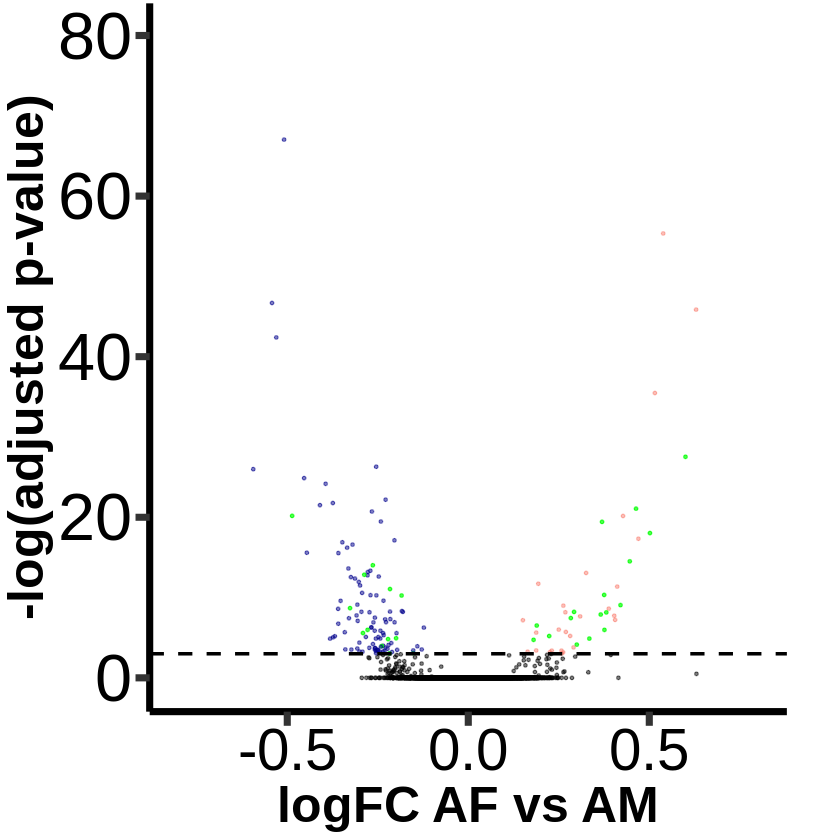

In [65]:
# removing Ddx3y and Xist are removed
ggplot(AF_AM,aes(x=avg_logFC,y=logp))+geom_point(size=size,color=color,alpha=alpha) +xlab("logFC AF vs AM")+ylab("-log(adjusted p-value)")+theme(axis.text.x=element_text(size=35, hjust = 0.5,colour = "black"),axis.text.y=element_text(size=40, hjust = 1,colour = "black"),axis.title.y=element_text(size=30,face="bold"),axis.title.x=element_text(size=30,face="bold"),plot.title = element_text(size=22),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=2),axis.ticks.length=unit(.3, "cm"),axis.ticks = element_line(size = 2), plot.margin = margin(2, 32, 5, 5))+
geom_hline(yintercept=-log(0.05), linetype="dashed",  color = "black", size=1)+xlim(-0.8,0.8)+ylim(-0.2,80)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/dimorphism/Esr1_3/dimorphicp_volcano_revise2.pdf",width=6,height=6,paper="letter")

# volcano plots sexually dimorphic genes in Esr1DEGs 

In [4]:
Esr1_DEGM<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/DEG/gene_adjust_0.1_0.1.xlsx",sheetIndex=1)[,1]
AM_AF<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AM_over_AF/All_gene.xlsx",sheetIndex=1) 
rownames(AM_AF)<-AM_AF[,1]
Esr1_DEGF<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/DEG/gene_adjust_0.1_0.1.xlsx",sheetIndex=1)[,1]
AF_AM<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AF_over_AM/All_gene.xlsx",sheetIndex=1) 
rownames(AF_AM)<-AF_AM[,1]

In [5]:
p_val_adjust<-numeric()
for(i in 1:dim(AF_AM)[1]){
    if(AF_AM$p_val_adjust[i]>1){p_val_adjust[i]<- 1}else{p_val_adjust[i]<-AF_AM$p_val_adjust[i]}
}
AF_AM$p_val_adjust<-p_val_adjust

In [6]:
AF_AM$logp<- -log(AF_AM$p_val_adjust)

In [8]:
Esr1_DEGM

[1] mt-Co2        mt-Atp6       mt-Nd4        mt-Nd1        Nts          
  [6] Rpl22l1       Gm47283       mt-Nd2        mt-Nd3        mt-Cytb      
 [11] Napb          mt-Co3        Tpt1          Rps24         Pdzrn4       
 [16] Fstl5         Pgr           Npm1          Kcnq1ot1      Gm10076      
 [21] mt-Nd5        Uqcrb         mt-Nd4l       Tmem35a       Rpl39        
 [26] Cntnap2       2010107E04Rik Esr1          Tcaf1         Nos1         
 [31] Vsnl1         Eif1b         Nexmif        Pak3          Nrip1        
 [36] Eef1b2        Id4           Ptp4a1        Rpl12         Irs4         
 [41] Ap1s2         Ctnna2        Gm9493        Chl1          Prkce        
 [46] Smim10l1      Lrp1b         5330434G04Rik Rpl30         Rpl7         
 [51] Khdrbs1       Tbca          Gdi2          Rpl23         Unc5d        
 [56] Map2          Grik1         Ndufa4        Prlr          Rps15a       
 [61] Nefl          Slc32a1       Pcdh7         Phyhipl       Rps4x        
 [66] Rpl17         Pcp4          Cnbp          Plcb4         Pdha1        
 [71] Nrp1          Tmcc3         Parm1         Drp2          Ankrd46      
 [76] Pgrmc1        Zmat4         Ube2v2        Cox5a         Eif4g2       
 [81] Rpl21         Rps12         Psd3          Meg3          Rps10        
 [86] Rps3a1        Fut9          Slitrk5       Eef1a1        Rps27rt      
 [91] Rplp1         Hmgcs1        Slitrk1       Hs3st5        Gfra1        
 [96] Rps20         Spock3        Prkacb        Chpt1         Mllt11       
[101] Cops2         Ntng1         Camk4         Eif3e         Maged1       
[106] Atp5f1        Snn           Ubl3          Gad2          Polr2k       
[111] Snhg12        Rplp2         Tcp1          Prkcb         Tsr2         
[116] Olfm3         Scoc          Fut8          Ola1          Large1       
[121] Mblac2        Minos1        Dynlt3        Hpcal1        Rps25        
[126] Lamp5         Actg1         Cadm2         mt-Co1        Pcdh17       
[131] Nap1l5        Rps2          Abat          Gpbp1         Adra2a       
[136] Atp5e         Spon1         Tspyl4        Fam92a        Snca         
[141] Ogt           Rtraf         Gm10073       Impact        Nrsn1        
[146] Hspa5         Fgfr1         Epm2aip1      Hsp90b1       Zfp638       
[151] Il1rap        Rpl18         Rps13         Rpl22         Hspa4l       
[156] Paip2         Rpl5          Rps27a        Serinc1       Rpl31        
[161] Pgm2l1        Mcts1         Tenm2         Polr3k        Zfp365       
[166] Zyg11b        Sptbn1        Arfgef3       Syt6          Swi5         
[171] Apoc3         Btf3          Tmem30a       Rpl9-ps6      Pdcd7        
[176] Rps17         Pts           Ptprm         Lingo2        Pdia3        
[181] Rtn4          Eif2s3y       Idi1          Smap1         Unc80        
[186] Rbfox3        Ncl           Cd83          Htr1b         Hspe1        
[191] Srsf3         Tmsb4x        Hspa8         Camta1        Tiparp       
[196] Rbms3         Cfl1          Tatdn1        Dld           Brinp2       
[201] Nbdy          Pip4k2a       Arl5a         Eloc          Arhgap36     
[206] Selenof       Rbbp7         Oxct1         Adarb2        Dnaja1       
[211] Zcchc18       Pgk1          Sh3gl2        Sec61g        Pcmt1        
[216] Armcx1        Shisa2        Rpl7a         Scml4         Nop56        
[221] Sccpdh        Rack1         Eif4g3        Adgrb3        Polr1d       
[226] Cct4          Itfg1         Lrrfip2       Pappa         Nap1l1       
[231] Stim2         Slitrk6       Rps7          Nudt4         Glra2        
[236] Gm16485       Fth1          Gabra3        Grin2a        Plcxd3       
[241] Astn1         Rpl26         Phactr1       Rpl23a        Tmod2        
[246] Rad23b        Cacybp        Pgam1         Cdh8          Frmd4a       
[251] Rmst          Npy1r         Sacs          Ets2          Epm2a        
[256] 5730455P16Rik Nedd4         Synj1         Galnt13       Sv2c         
[261] Reep5         Ece2          Dnajc19       A8

In [71]:
head(AF_AM)

,NA.,p_val,avg_logFC,pct.1,pct.2,p_val_adj,p_val_adjust,logp
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Xist,Xist,1.393834e-90,2.2884306,0.992,0.000,2.835755e-86,2.227486e-86,197.2214444
Fgfr1,Fgfr1,3.885375e-05,0.6301926,0.693,0.638,7.904795e-01,6.119465e-01,0.4911104
Esr1,Esr1,7.576594e-25,0.6292090,0.887,0.664,1.541458e-20,1.210437e-20,45.8607206
Slc18a2,Slc18a2,6.964374e-17,0.5999570,0.518,0.166,1.416902e-12,1.112420e-12,27.5244837
Rps27rt,Rps27rt,5.738869e-29,0.5383111,0.969,0.868,1.167573e-24,9.169564e-25,55.3487376
Pcp4,Pcp4,2.461578e-20,0.5153354,1.000,0.991,5.008079e-16,3.932124e-16,35.4721818


In [7]:
#210723
color<-numeric()
size<-numeric()
alpha<-numeric()
for(i in 1:dim(AF_AM)[1]){
    if(AF_AM$p_val_adjust[i]< 0.05 & AF_AM$avg_logFC[i]<0){
        color[i]<-"darkblue"
        size[i]<-0.7
        alpha[i]<-0.5
    } else if(AF_AM$p_val_adjust[i]< 0.05 & AF_AM$avg_logFC[i]>0){
        color[i]<-"salmon"
        size[i]<-0.7
        alpha[i]<-0.5

    }else{
        color[i]<-"black"
        size[i]<-0.5
        alpha[i]<-0.5
    }
}
AF_AM$colors<-color

In [72]:
color<-numeric()
size<-numeric()
alpha<-numeric()
for(i in 1:dim(AF_AM)[1]){
    if(AF_AM$p_val_adjust[i]< 0.05 & rownames(AF_AM)[i] %in% Esr1_DEGM & AF_AM$avg_logFC[i]<0){
        color[i]<-"darkblue"
        size[i]<-0.7
        alpha[i]<-0.5
    } else if(AF_AM$p_val_adjust[i]< 0.05 & rownames(AF_AM)[i] %in% Esr1_DEGF & AF_AM$avg_logFC[i]>0){
        color[i]<-"salmon"
        size[i]<-0.7
        alpha[i]<-0.5

    }else{
        color[i]<-"black"
        size[i]<-0.5
        alpha[i]<-0.5
    }
}
AF_AM$colors<-color

In [10]:

write.xlsx2(AF_AM,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/dimorphism/Esr1_3/dimorphicp_volcano_P50FvsP50M_revise2.xlsx")

In [10]:
max(AF_AM$avg_logFC)
min(AF_AM$avg_logFC)
max(AF_AM$logp)
min(AF_AM$logp)

[1] 2.288431

[1] -1.111892

[1] 197.2214

[1] 0

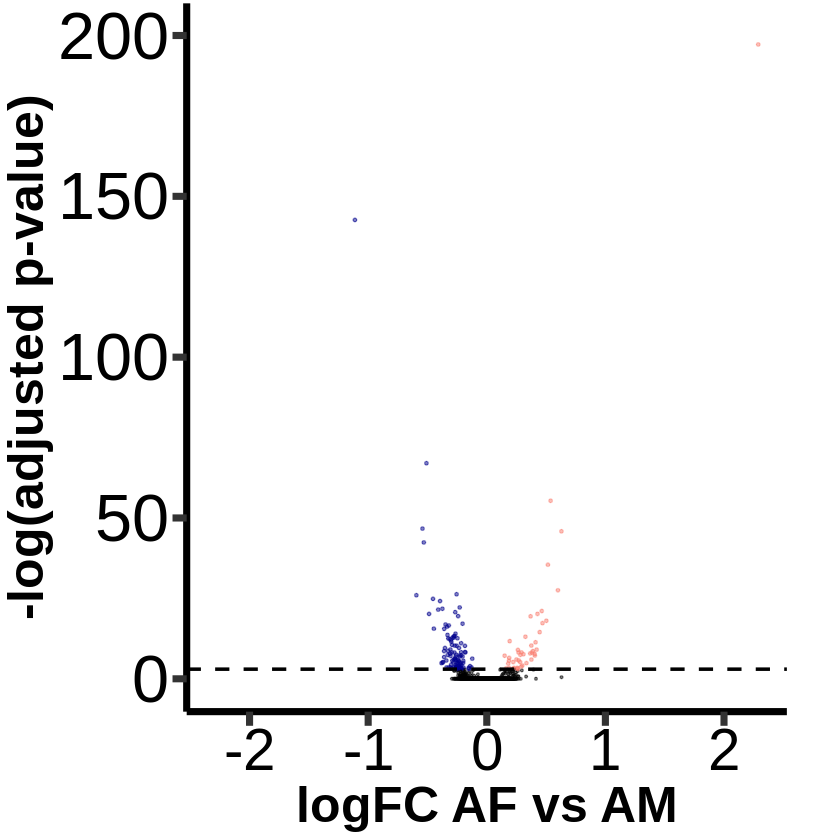

In [11]:
#used in the paper
ggplot(AF_AM,aes(x=avg_logFC,y=logp))+geom_point(size=size,color=color,alpha=alpha) +xlab("logFC AF vs AM")+ylab("-log(adjusted p-value)")+theme(axis.text.x=element_text(size=35, hjust = 0.5,colour = "black"),axis.text.y=element_text(size=40, hjust = 1,colour = "black"),axis.title.y=element_text(size=30,face="bold"),axis.title.x=element_text(size=30,face="bold"),plot.title = element_text(size=22),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=2),axis.ticks.length=unit(.3, "cm"),axis.ticks = element_line(size = 2), plot.margin = margin(2, 32, 5, 5))+
geom_hline(yintercept=-log(0.05), linetype="dashed",  color = "black", size=1)+xlim(-2.3,2.3)+ylim(-0.2,200)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/dimorphism/Esr1_3/dimorphicp_volcano_revise2.pdf",width=6,height=6,paper="letter")

In [18]:
sum(AF_AM$colors=="salmon")
sum(AF_AM$colors=="darkblue")

[1] 45

[1] 110

In [76]:
dim(subset(AF_AM,p_val_adjust<0.05))
dim(subset(AF_AM,p_val_adjust<0.05 & avg_logFC>0))
dim(subset(AF_AM,p_val_adjust<0.05 & avg_logFC<0))
sum(rownames(subset(AF_AM,p_val_adjust<0.05 & avg_logFC>0)) %in%  Esr1_DEGF)
sum(rownames(subset(AF_AM,p_val_adjust<0.05 & avg_logFC<0)) %in%  Esr1_DEGM)

[1] 155   9

[1] 45  9

[1] 110   9

[1] 32

[1] 39

# Cast vs OVX

In [4]:
Cast_OVX<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/Cast_over_OVX/All_gene.xlsx",sheetIndex=1) 
rownames(Cast_OVX)<-Cast_OVX[,1]
OVX_Cast<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/OVX_over_Cast/All_gene.xlsx",sheetIndex=1) 
rownames(OVX_Cast)<-OVX_Cast[,1]

In [5]:
p_val_adjust<-numeric()
for(i in 1:dim(OVX_Cast)[1]){
    if(OVX_Cast$p_val_adjust[i]>1){p_val_adjust[i]<- 1}else{p_val_adjust[i]<-OVX_Cast$p_val_adjust[i]}
}
OVX_Cast$p_val_adjust<-p_val_adjust

In [6]:
OVX_Cast$logp<- -log(OVX_Cast$p_val_adjust)

In [7]:
#220401
color<-numeric()
size<-numeric()
alpha<-numeric()
for(i in 1:dim(OVX_Cast)[1]){
    if(OVX_Cast$p_val_adjust[i]< 0.05 & OVX_Cast$avg_logFC[i]<0){
        color[i]<-"darkblue"
        size[i]<-0.7
        alpha[i]<-0.5
    } else if(OVX_Cast$p_val_adjust[i]< 0.05 & OVX_Cast$avg_logFC[i]>0){
        color[i]<-"salmon"
        size[i]<-0.7
        alpha[i]<-0.5

    }else{
        color[i]<-"black"
        size[i]<-0.5
        alpha[i]<-0.5
    }
}
OVX_Cast$colors<-color

In [7]:
write.xlsx2(OVX_Cast,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/dimorphism/Esr1_3/dimorphicp_volcano_OVXvsCast.xlsx")

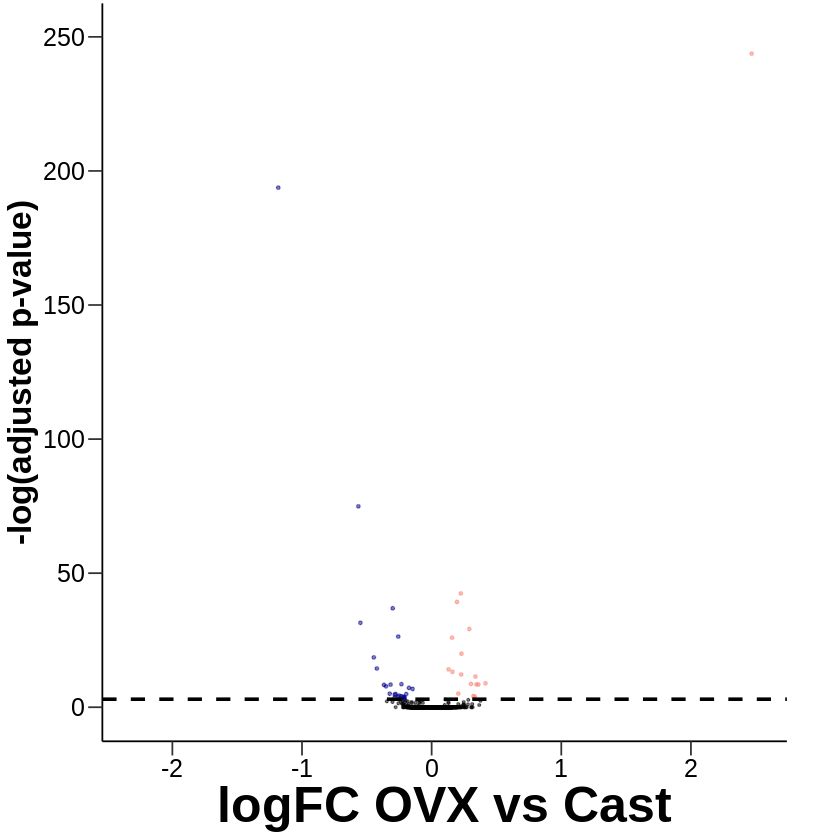

In [9]:
#used in the paper same scale as P50F M
ggplot(OVX_Cast,aes(x=avg_logFC,y=logp))+geom_point(size=size,color=color,alpha=alpha) +xlab("logFC OVX vs Cast")+ylab("-log(adjusted p-value)")+theme(axis.text.x=element_text(size=15, hjust = 0.5,colour = "black"),axis.text.y=element_text(size=15, hjust = 1,colour = "black"),axis.title.y=element_text(size=20,face="bold"),axis.title.x=element_text(size=30,face="bold"),plot.title = element_text(size=22),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=0.5),axis.ticks.length=unit(.3, "cm"),axis.ticks = element_line(size = 0.5), plot.margin = margin(2, 32, 5, 5))+
geom_hline(yintercept=-log(0.05), linetype="dashed",  color = "black", size=1)+xlim(-2.3,2.5)+ylim(-0.2,250)
ggsave(file="/media/garret/New Volume/paper submission/MPOA_Science/Revision_Figures/raw/dimorphicp_volcano_OVXvsCast_250.pdf",width=6,height=6,paper="letter")

# addressing whether  puberty genes that are elevating, are common or dimorphic?

In [3]:
# male, intact P50 vs Esr1KO and highlight dimorphic genes

In [12]:
Male_rich<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AM_over_AF/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)
Female_rich<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AF_over_AM/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)

P50M_Esr1KO<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/DEG/All_gene.xlsx",sheetIndex=1) 
rownames(P50M_Esr1KO)<-P50M_Esr1KO[,1]

In [13]:
male_rich<-Male_rich[,1]
female_rich<-Female_rich[,1]


In [14]:
length(male_rich)

[1] 110

In [15]:
length(female_rich)

[1] 45

In [7]:
p_val_adjust<-numeric()
for(i in 1:dim(P50M_Esr1KO)[1]){
    if(P50M_Esr1KO$p_val_adjust[i]>1){p_val_adjust[i]<- 1}else{p_val_adjust[i]<-P50M_Esr1KO$p_val_adjust[i]}
}
P50M_Esr1KO$p_val_adjust<-p_val_adjust

In [8]:
P50M_Esr1KO$logp<- -log(P50M_Esr1KO$p_val_adjust)

In [9]:
color<-numeric()
size<-numeric()
alpha<-numeric()
for(i in 1:dim(P50M_Esr1KO)[1]){
    if(P50M_Esr1KO$p_val_adjust[i]< 0.05 & rownames(P50M_Esr1KO)[i] %in% male_rich){
        color[i]<-"darkblue"
        size[i]<-1.2
        alpha[i]<-0.7
    } else if(P50M_Esr1KO$p_val_adjust[i]< 0.05 & rownames(P50M_Esr1KO)[i] %in% female_rich){
        color[i]<-"salmon"
        size[i]<-1.2
        alpha[i]<-0.7
    }else if(P50M_Esr1KO$p_val_adjust[i]< 0.05 & !(rownames(P50M_Esr1KO)[i] %in% male_rich)){
        color[i]<-"black"
        size[i]<-0.2
        alpha[i]<-0.2
    }else if(P50M_Esr1KO$p_val_adjust[i]< 0.05 & !(rownames(P50M_Esr1KO)[i] %in% female_rich)){
        color[i]<-"black"
        size[i]<-0.2
        alpha[i]<-0.2
    }else if(P50M_Esr1KO$p_val_adjust[i]> 0.05 & P50M_Esr1KO$p_val_adjust[i]< 1 & !(rownames(P50M_Esr1KO)[i] %in% male_rich)){
        color[i]<-"black"
        size[i]<-0.2
        alpha[i]<-0.2
    }else{
        color[i]<-"black"
        size[i]<-0.001
        alpha[i]<-0.5
    }
}

In [12]:
color<-numeric()
size<-numeric()
alpha<-numeric()
sizy<-0.7
for(i in 1:dim(P50M_Esr1KO)[1]){
    if(P50M_Esr1KO$p_val_adjust[i]< 0.05 & rownames(P50M_Esr1KO)[i] %in% male_rich){
        color[i]<-"darkblue"
        size[i]<-sizy
        alpha[i]<-0.7
    } else if(P50M_Esr1KO$p_val_adjust[i]< 0.05 & rownames(P50M_Esr1KO)[i] %in% female_rich){
        color[i]<-"salmon"
        size[i]<-sizy
        alpha[i]<-0.7
    }else if(P50M_Esr1KO$p_val_adjust[i]< 0.05 & !(rownames(P50M_Esr1KO)[i] %in% male_rich)){
        color[i]<-"black"
        size[i]<-sizy
        alpha[i]<-0.2
    }else if(P50M_Esr1KO$p_val_adjust[i]< 0.05 & !(rownames(P50M_Esr1KO)[i] %in% female_rich)){
        color[i]<-"black"
        size[i]<-sizy
        alpha[i]<-0.2
    }else if(P50M_Esr1KO$p_val_adjust[i]> 0.05 & P50M_Esr1KO$p_val_adjust[i]< 1 & !(rownames(P50M_Esr1KO)[i] %in% male_rich)){
        color[i]<-"black"
        size[i]<-sizy
        alpha[i]<-0.2
    }else{
        color[i]<-"black"
        size[i]<-sizy
        alpha[i]<-0.5
    }
}

In [11]:
P50M_Esr1KO$avg_logFC[order(P50M_Esr1KO$avg_logFC)]

[1] -9.960814e-01 -7.112294e-01 -6.555718e-01 -6.132474e-01 -6.113943e-01
    [6] -5.583260e-01 -5.468105e-01 -5.212747e-01 -5.104058e-01 -5.071129e-01
   [11] -5.036338e-01 -4.979541e-01 -4.893986e-01 -4.884375e-01 -4.794782e-01
   [16] -4.751040e-01 -4.690867e-01 -4.681513e-01 -4.606259e-01 -4.565428e-01
   [21] -4.536375e-01 -4.468611e-01 -4.384169e-01 -4.319244e-01 -4.118432e-01
   [26] -4.083121e-01 -4.034452e-01 -4.030989e-01 -3.980672e-01 -3.973293e-01
   [31] -3.971880e-01 -3.970531e-01 -3.940738e-01 -3.921539e-01 -3.912120e-01
   [36] -3.904280e-01 -3.901306e-01 -3.851304e-01 -3.836076e-01 -3.781148e-01
   [41] -3.773843e-01 -3.762171e-01 -3.755749e-01 -3.735986e-01 -3.644571e-01
   [46] -3.600964e-01 -3.596546e-01 -3.589874e-01 -3.508226e-01 -3.470121e-01
   [51] -3.436696e-01 -3.431178e-01 -3.416697e-01 -3.393442e-01 -3.387077e-01
   [56] -3.367085e-01 -3.362576e-01 -3.350023e-01 -3.322052e-01 -3.320195e-01
   [61] -3.275908e-01 -3.246454e-01 -3.243349e-01 -3.233846e-01 -3.219256e-01
   [66] -3.197519e-01 -3.188868e-01 -3.188667e-01 -3.175707e-01 -3.173675e-01
   [71] -3.173037e-01 -3.168175e-01 -3.167761e-01 -3.158506e-01 -3.156263e-01
   [76] -3.152826e-01 -3.143743e-01 -3.134981e-01 -3.131777e-01 -3.125022e-01
   [81] -3.116640e-01 -3.057573e-01 -3.029545e-01 -3.012305e-01 -3.008839e-01
   [86] -2.989553e-01 -2.978966e-01 -2.977576e-01 -2.955706e-01 -2.943322e-01
   [91] -2.923554e-01 -2.890299e-01 -2.880594e-01 -2.873034e-01 -2.835745e-01
   [96] -2.824617e-01 -2.824611e-01 -2.808846e-01 -2.808701e-01 -2.800014e-01
  [101] -2.798185e-01 -2.790004e-01 -2.786533e-01 -2.769156e-01 -2.762745e-01
  [106] -2.762272e-01 -2.760923e-01 -2.734477e-01 -2.708398e-01 -2.707917e-01
  [111] -2.694470e-01 -2.691374e-01 -2.688884e-01 -2.668322e-01 -2.658104e-01
  [116] -2.641052e-01 -2.640940e-01 -2.639879e-01 -2.636670e-01 -2.626536e-01
  [121] -2.625483e-01 -2.618772e-01 -2.616480e-01 -2.595222e-01 -2.587126e-01
  [126] -2.584496e-01 -2.577622e-01 -2.570986e-01 -2.561035e-01 -2.559461e-01
  [131] -2.556637e-01 -2.553575e-01 -2.553465e-01 -2.545010e-01 -2.528258e-01
  [136] -2.527971e-01 -2.519851e-01 -2.516388e-01 -2.506969e-01 -2.506671e-01
  [141] -2.500620e-01 -2.499269e-01 -2.497872e-01 -2.473273e-01 -2.470217e-01
  [146] -2.464288e-01 -2.461865e-01 -2.452854e-01 -2.449107e-01 -2.447470e-01
  [151] -2.445423e-01 -2.444997e-01 -2.444886e-01 -2.444475e-01 -2.434421e-01
  [156] -2.432292e-01 -2.431172e-01 -2.430282e-01 -2.425223e-01 -2.424281e-01
  [161] -2.413686e-01 -2.404277e-01 -2.393765e-01 -2.385914e-01 -2.381563e-01
  [166] -2.370511e-01 -2.364854e-01 -2.361838e-01 -2.357132e-01 -2.345455e-01
  [171] -2.343409e-01 -2.337825e-01 -2.326224e-01 -2.324058e-01 -2.322458e-01
  [176] -2.322346e-01 -2.317787e-01 -2.317727e-01 -2.306394e-01 -2.304142e-01
  [181] -2.301516e-01 -2.300429e-01 -2.297823e-01 -2.289637e-01 -2.287303e-01
  [186] -2.285725e-01 -2.270374e-01 -2.269153e-01 -2.268978e-01 -2.260933e-01
  [191] -2.255547e-01 -2.254438e-01 -2.253522e-01 -2.248013e-01 -2.239030e-01
  [196] -2.238923e-01 -2.238866e-01 -2.232927e-01 -2.231191e-01 -2.230284e-01
  [201] -2.220315e-01 -2.218930e-01 -2.205385e-01 -2.203793e-01 -2.193581e-01
  [206] -2.193125e-01 -2.192206e-01 -2.184377e-01 -2.183904e-01 -2.170898e-01
  [211] -2.170434e-01 -2.169443e-01 -2.167382e-01 -2.167331e-01 -2.166424e-01
  [216] -2.166142e-01 -2.165218e-01 -2.163411e-01 -2.162954e-01 -2.161051e-01
  [221] -2.158885e-01 -2.151025e-01 -2.145341e-01 -2.142280e-01 -2.140219e-01
  [226] -2.139576e-01 -2.132322e-01 -2.128384e-01 -2.125008e-01 -2.124841e-01
  [231] -2.124036e-01 -2.122023e-01 -2.114539e-01 -2.111578e-01 -2.105005e-01
  [236] -2.104102e-01 -2.100142e-01 -2.096057e-01 -2.094261e-01 -2.091488e-01
  [241] -2.083121e-01 -2.080668e-01 -2.074625e-01 -2.066796e-01 -2.064695e-01
  [246] -2.061425e-01 -2.051053e-01 -2.045457e-01 -2.041779e-01 -2.040602e-01
  [251] -2.037389e-01 -2.029275e-01 -2.027180e-01 -2.025705e-01 -2.001566e-01
  [256] -2.000994e-01 -2.0

In [12]:
P50M_Esr1KO$logp[order(P50M_Esr1KO$logp)]

[1] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
    [6] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [11] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [16] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [21] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [26] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [31] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [36] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [41] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [46] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [51] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [56] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [61] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [66] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [71] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [76] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [81] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [86] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [91] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [96] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [101] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [106] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [111] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [116] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [121] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [126] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [131] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [136] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [141] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [146] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [151] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [156] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [161] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [166] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [171] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [176] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [181] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [186] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [191] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [196] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [201] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [206] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [211] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [216] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [221] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [226] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [231] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [236] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [241] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [246] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [251] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [256] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [261] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [266] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [271] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.

In [20]:
dim(P50M_Esr1KO)

[1] 16551     8

In [13]:
P50M_Esr1KO$colors<-color
write.xlsx2(P50M_Esr1KO,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/dimorphism/Esr1_3/dimorphicp_volcano_P50vsEsr1KOM_revise.xlsx")

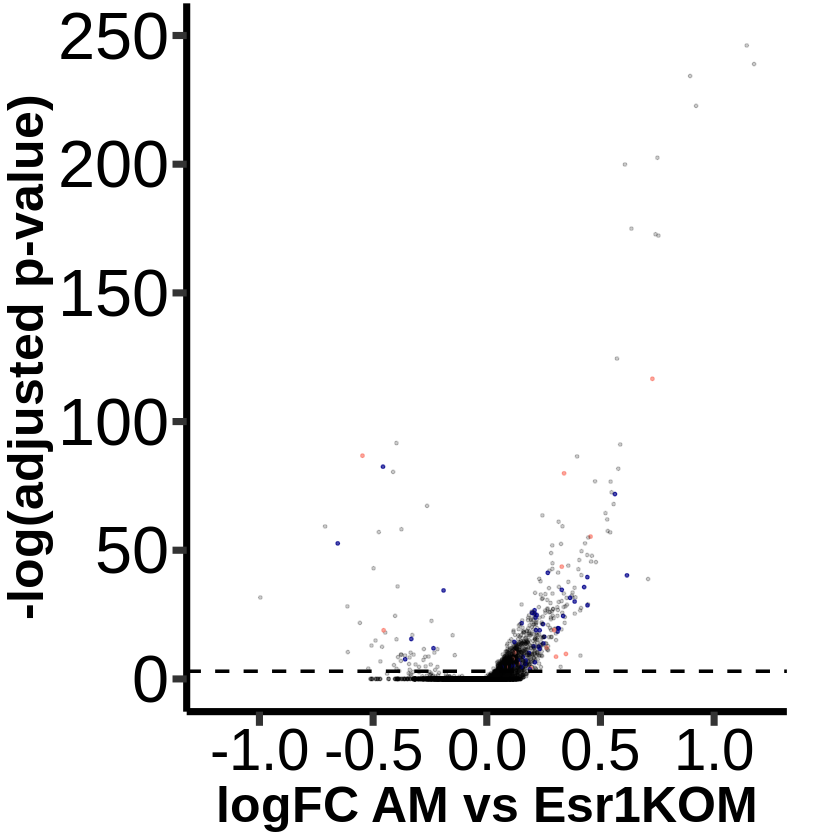

In [14]:
# removing Ddx3y and Xist are removed
ggplot(P50M_Esr1KO,aes(x=avg_logFC,y=logp))+geom_point(size=size,color=color,alpha=alpha) +xlab("logFC AM vs Esr1KOM")+ylab("-log(adjusted p-value)")+theme(axis.text.x=element_text(size=35, hjust = 0.5,colour = "black"),axis.text.y=element_text(size=40, hjust = 1,colour = "black"),axis.title.y=element_text(size=30,face="bold"),axis.title.x=element_text(size=30,face="bold"),plot.title = element_text(size=22),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=2),axis.ticks.length=unit(.3, "cm"),axis.ticks = element_line(size = 2), plot.margin = margin(2, 32, 5, 5))+
geom_hline(yintercept=-log(0.05), linetype="dashed",  color = "black", size=1)+xlim(-1.2,1.2)+ylim(-0.2,250)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/dimorphism/Esr1_3/dimorphicp_volcano_P50vsEsr1KOM_revise.pdf",width=6,height=6,paper="letter")

In [10]:
dim(subset(P50M_Esr1KO,p_val_adjust<0.05))
dim(subset(P50M_Esr1KO,p_val_adjust<0.05 & avg_logFC>0))
dim(subset(P50M_Esr1KO,p_val_adjust<0.05 & avg_logFC<0))

sum(rownames(subset(P50M_Esr1KO,p_val_adjust<0.05)) %in%  male_rich)
sum(rownames(subset(P50M_Esr1KO,p_val_adjust<0.05  & avg_logFC>0)) %in%  male_rich)

sum(rownames(subset(P50M_Esr1KO,p_val_adjust<0.05)) %in%  female_rich)
sum(rownames(subset(P50M_Esr1KO,p_val_adjust<0.05 & avg_logFC>0)) %in%  female_rich)

[1] 989   8

[1] 932   8

[1] 57  8

[1] 46

[1] 40

[1] 15

[1] 13

In [11]:
Increase<-100*40/110
Decrease<-100*6/110
No_change<-100*(110-46)/110

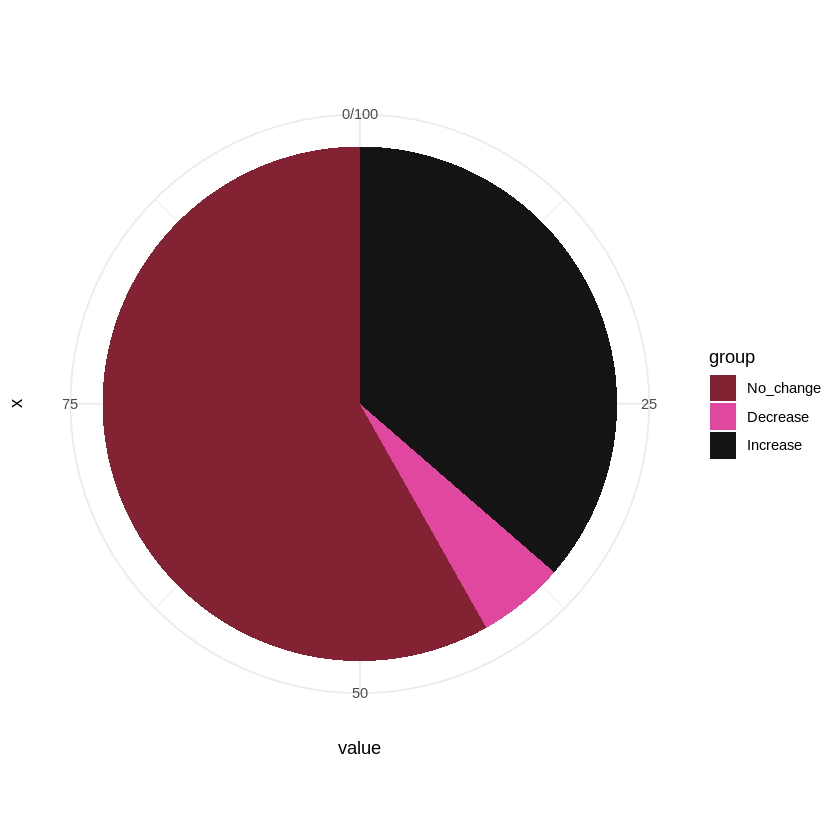

In [13]:
#male dimorphic gene, pie chart
df <- data.frame(
  group = c("Increase", "Decrease", "No_change"),
  value = c(Increase, Decrease, No_change)
  )
df$group<-factor(df$group,levels=rev(c("Increase", "Decrease", "No_change")))
ggplot(df, aes(x="", y=value, fill=group))+
geom_bar(width = 1, stat = "identity")+ coord_polar("y", start=0)+
scale_fill_manual(values=rev(c("gray8","#E0479E", "#832232")))+
theme_minimal()
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/dimorphism/Esr1_3/Pie_chart_for_dimorphicp_volcano_P50vsEsr1KOM_male_dimorphic_gene.pdf",width=8,height=7)

In [26]:
df

gene,fraction
<fct>,<dbl>
female,28.888889
female,-4.444444
male,36.363636
male,-5.454545


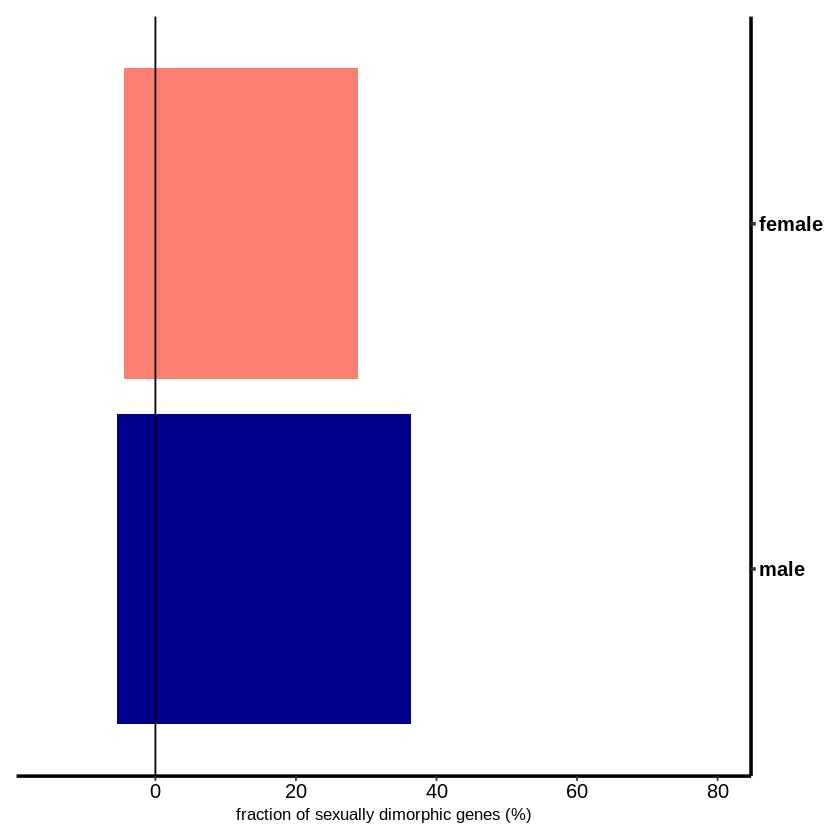

In [39]:
Increase_m<-100*40/110
Decrease_m<-100*6/110
Increase_f<-100*13/45
Decrease_f<-100*2/45

df <- data.frame(
  gene = c("female", "female","male","male"),
  fraction = c(Increase_f, -Decrease_f,Increase_m, -Decrease_m)
  )
df$gene<-factor(df$gene,levels=rev(c("female", "male")))
P<- ggplot(df, aes(x=gene, y=fraction,group=gene,fill=gene))+geom_bar(stat="identity")+ coord_flip()+scale_x_discrete(position = "top") +scale_fill_manual(values=c('darkblue','salmon'))+ylim(-15,80)+ geom_hline(yintercept=0, linetype="solid", color = "black")
P+theme(axis.title.y=element_blank(),
        ,axis.text.y=element_text(size=12,colour="black",face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),legend.position = "none",
panel.background = element_blank(),axis.text.x=element_text(size=12,angle = 0, hjust = 0.5,color="black"),axis.title.x=element_text(size=10), axis.line = element_line(colour = "black",size=1),axis.ticks.length=unit(.1, "cm"),  axis.ticks.y = element_line(size=1) , plot.margin = margin(10, 10, 10, 10))+ylab("fraction of sexually dimorphic genes (%)")
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/dimorphism/Esr1_3/bar_for_dimorphicp_volcano_P50vsEsr1KOM_male_and_female_dimorphic_gene.pdf",height=4, width=10 , paper = "letter")



In [16]:
Increase<-100*13/45
Decrease<-100*2/45
No_change<-100*(45-15)/45

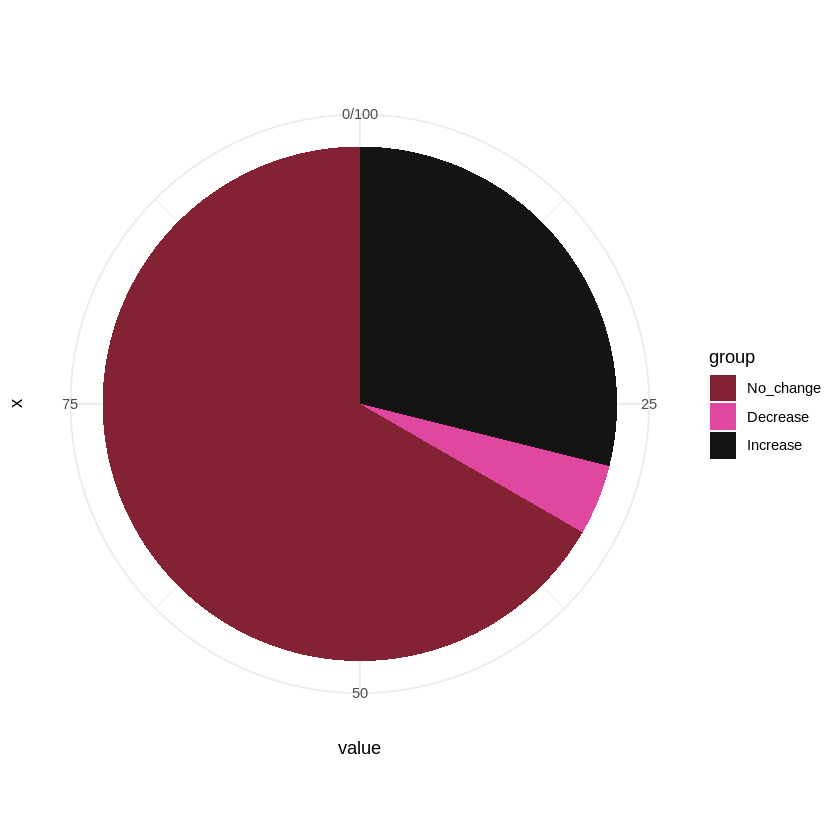

In [17]:
#female dimorphic gene
df <- data.frame(
  group = c("Increase", "Decrease", "No_change"),
  value = c(Increase, Decrease, No_change)
  )
df$group<-factor(df$group,levels=rev(c("Increase", "Decrease", "No_change")))
ggplot(df, aes(x="", y=value, fill=group))+
geom_bar(width = 1, stat = "identity")+ coord_polar("y", start=0)+
scale_fill_manual(values=rev(c("gray8","#E0479E", "#832232")))+
theme_minimal()
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/dimorphism/Esr1_3/Pie_chart_for_dimorphicp_volcano_P50vsEsr1KOM_female_dimorphic_gene.pdf",width=8,height=7)

In [26]:
# female, intact P50 vs Esr1KO and highlight dimorphic genes

In [3]:
Male_rich<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AM_over_AF/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)
Female_rich<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AF_over_AM/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)

P50F_Esr1KO<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/DEG/All_gene.xlsx",sheetIndex=1) 
rownames(P50F_Esr1KO)<-P50F_Esr1KO[,1]

In [4]:
male_rich<-Male_rich[,1]
female_rich<-Female_rich[,1]

In [5]:
p_val_adjust<-numeric()
for(i in 1:dim(P50F_Esr1KO)[1]){
    if(P50F_Esr1KO$p_val_adjust[i]>1){p_val_adjust[i]<- 1}else{p_val_adjust[i]<-P50F_Esr1KO$p_val_adjust[i]}
}
P50F_Esr1KO$p_val_adjust<-p_val_adjust

In [6]:
P50F_Esr1KO$logp<- -log(P50F_Esr1KO$p_val_adjust)

In [8]:
P50F_Esr1KO$avg_logFC[order(P50F_Esr1KO$avg_logFC)]

[1] -1.230497e+00 -1.228397e+00 -1.226216e+00 -1.067438e+00 -9.267573e-01
    [6] -9.266347e-01 -8.685352e-01 -8.595332e-01 -8.030876e-01 -7.995348e-01
   [11] -7.620065e-01 -7.518330e-01 -7.455176e-01 -7.195406e-01 -7.132976e-01
   [16] -6.880394e-01 -6.387015e-01 -6.009815e-01 -5.947230e-01 -5.887698e-01
   [21] -5.732872e-01 -5.705877e-01 -5.685598e-01 -5.664295e-01 -5.507213e-01
   [26] -5.493153e-01 -5.485597e-01 -5.460647e-01 -5.402716e-01 -5.335483e-01
   [31] -5.321650e-01 -5.233371e-01 -5.146938e-01 -5.038504e-01 -4.995861e-01
   [36] -4.898444e-01 -4.812949e-01 -4.786192e-01 -4.780668e-01 -4.749359e-01
   [41] -4.744780e-01 -4.725784e-01 -4.725054e-01 -4.693038e-01 -4.652423e-01
   [46] -4.641016e-01 -4.626031e-01 -4.588649e-01 -4.576414e-01 -4.551261e-01
   [51] -4.540088e-01 -4.488941e-01 -4.410046e-01 -4.389195e-01 -4.350262e-01
   [56] -4.306323e-01 -4.176275e-01 -4.163866e-01 -4.155638e-01 -4.072525e-01
   [61] -4.064314e-01 -4.055899e-01 -4.008600e-01 -4.004939e-01 -4.004345e-01
   [66] -3.967123e-01 -3.965967e-01 -3.942913e-01 -3.913358e-01 -3.903056e-01
   [71] -3.896829e-01 -3.872149e-01 -3.763344e-01 -3.751144e-01 -3.700336e-01
   [76] -3.651185e-01 -3.622598e-01 -3.610222e-01 -3.596250e-01 -3.584991e-01
   [81] -3.555732e-01 -3.520686e-01 -3.507277e-01 -3.496911e-01 -3.464742e-01
   [86] -3.460056e-01 -3.456560e-01 -3.428109e-01 -3.420715e-01 -3.405539e-01
   [91] -3.404855e-01 -3.401264e-01 -3.384239e-01 -3.379636e-01 -3.365869e-01
   [96] -3.364401e-01 -3.362176e-01 -3.356212e-01 -3.349125e-01 -3.340304e-01
  [101] -3.337777e-01 -3.311859e-01 -3.311364e-01 -3.302575e-01 -3.291503e-01
  [106] -3.283516e-01 -3.253966e-01 -3.250542e-01 -3.234028e-01 -3.224103e-01
  [111] -3.210214e-01 -3.200023e-01 -3.197249e-01 -3.186374e-01 -3.182904e-01
  [116] -3.181508e-01 -3.158311e-01 -3.153614e-01 -3.121231e-01 -3.110033e-01
  [121] -3.102941e-01 -3.089971e-01 -3.078160e-01 -3.069568e-01 -3.068168e-01
  [126] -3.063284e-01 -3.048645e-01 -3.046658e-01 -3.042945e-01 -3.018359e-01
  [131] -3.014603e-01 -3.010442e-01 -3.003857e-01 -3.003596e-01 -3.000975e-01
  [136] -2.996713e-01 -2.990562e-01 -2.988787e-01 -2.977580e-01 -2.973273e-01
  [141] -2.942842e-01 -2.926371e-01 -2.923064e-01 -2.909288e-01 -2.905677e-01
  [146] -2.905427e-01 -2.904609e-01 -2.900364e-01 -2.888987e-01 -2.885905e-01
  [151] -2.873050e-01 -2.869540e-01 -2.865961e-01 -2.863850e-01 -2.862241e-01
  [156] -2.852400e-01 -2.849314e-01 -2.849052e-01 -2.823176e-01 -2.817042e-01
  [161] -2.807058e-01 -2.798752e-01 -2.793654e-01 -2.784116e-01 -2.781988e-01
  [166] -2.778960e-01 -2.768715e-01 -2.764985e-01 -2.764183e-01 -2.762500e-01
  [171] -2.756087e-01 -2.754857e-01 -2.751848e-01 -2.744680e-01 -2.734372e-01
  [176] -2.728107e-01 -2.727505e-01 -2.725403e-01 -2.722205e-01 -2.715867e-01
  [181] -2.712005e-01 -2.706809e-01 -2.703370e-01 -2.702309e-01 -2.691866e-01
  [186] -2.688953e-01 -2.680054e-01 -2.657913e-01 -2.654589e-01 -2.649754e-01
  [191] -2.648335e-01 -2.641406e-01 -2.641233e-01 -2.641188e-01 -2.640566e-01
  [196] -2.637622e-01 -2.635776e-01 -2.628227e-01 -2.626729e-01 -2.626010e-01
  [201] -2.621356e-01 -2.617462e-01 -2.613062e-01 -2.606977e-01 -2.606112e-01
  [206] -2.604778e-01 -2.594947e-01 -2.589169e-01 -2.588913e-01 -2.571001e-01
  [211] -2.562328e-01 -2.556319e-01 -2.554211e-01 -2.551267e-01 -2.547362e-01
  [216] -2.545609e-01 -2.540381e-01 -2.536990e-01 -2.529051e-01 -2.528201e-01
  [221] -2.506572e-01 -2.506376e-01 -2.503965e-01 -2.501869e-01 -2.485819e-01
  [226] -2.482043e-01 -2.481632e-01 -2.476939e-01 -2.473420e-01 -2.469886e-01
  [231] -2.451949e-01 -2.448450e-01 -2.445193e-01 -2.444806e-01 -2.430627e-01
  [236] -2.430473e-01 -2.424260e-01 -2.419678e-01 -2.418217e-01 -2.408947e-01
  [241] -2.408537e-01 -2.398006e-01 -2.397135e-01 -2.396375e-01 -2.380992e-01
  [246] -2.375480e-01 -2.375244e-01 -2.375098e-01 -2.374621e-01 -2.371362e-01
  [251] -2.363166e-01 -2.362046e-01 -2.354604e-01 -2.349388e-01 -2.346138e-01
  [256] -2.343321e-01 -2.3

In [9]:
color<-numeric()
size<-numeric()
alpha<-numeric()
for(i in 1:dim(P50F_Esr1KO)[1]){
    if(P50F_Esr1KO$p_val_adjust[i]< 0.05 & rownames(P50F_Esr1KO)[i] %in% male_rich){
        color[i]<-"darkblue"
        size[i]<-1.2
        alpha[i]<-0.7
    } else if(P50F_Esr1KO$p_val_adjust[i]< 0.05 & rownames(P50F_Esr1KO)[i] %in% female_rich){
        color[i]<-"salmon"
        size[i]<-1.2
        alpha[i]<-0.7
    }else if(P50F_Esr1KO$p_val_adjust[i]< 0.05 & !(rownames(P50F_Esr1KO)[i] %in% male_rich)){
        color[i]<-"black"
        size[i]<-0.2
        alpha[i]<-0.2
    }else if(P50F_Esr1KO$p_val_adjust[i]< 0.05 & !(rownames(P50F_Esr1KO)[i] %in% female_rich)){
        color[i]<-"black"
        size[i]<-0.2
        alpha[i]<-0.2
    }else if(P50F_Esr1KO$p_val_adjust[i]> 0.05 & P50F_Esr1KO$p_val_adjust[i]< 1 & !(rownames(P50F_Esr1KO)[i] %in% female_rich)){
        color[i]<-"black"
        size[i]<-0.2
        alpha[i]<-0.2
    }else{
        color[i]<-"black"
        size[i]<-0.001
        alpha[i]<-0.5
    }
}

In [10]:
P50F_Esr1KO$colors<-color
write.xlsx2(P50F_Esr1KO,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/dimorphism/Esr1_3/dimorphicp_volcano_P50vsEsr1KOF_revise.xlsx")

In [10]:
dim(P50F_Esr1KO)

[1] 16700     8

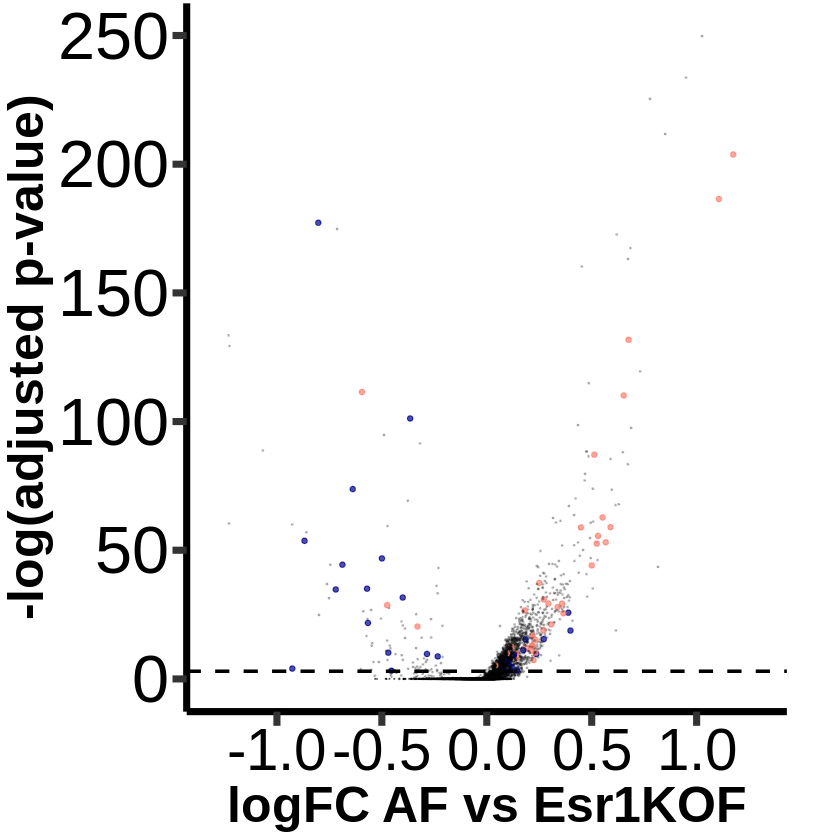

In [11]:
# removing Ddx3y and Xist are removed
ggplot(P50F_Esr1KO,aes(x=avg_logFC,y=logp))+geom_point(size=size,color=color,alpha=alpha) +xlab("logFC AF vs Esr1KOF")+ylab("-log(adjusted p-value)")+theme(axis.text.x=element_text(size=35, hjust = 0.5,colour = "black"),axis.text.y=element_text(size=40, hjust = 1,colour = "black"),axis.title.y=element_text(size=30,face="bold"),axis.title.x=element_text(size=30,face="bold"),plot.title = element_text(size=22),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=2),axis.ticks.length=unit(.3, "cm"),axis.ticks = element_line(size = 2), plot.margin = margin(2, 32, 5, 5))+
geom_hline(yintercept=-log(0.05), linetype="dashed",  color = "black", size=1)+xlim(-1.3,1.3)+ylim(-0.2,250)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/dimorphism/Esr1_3/dimorphicp_volcano_P50FvsEsr1KOF.pdf",width=6,height=6,paper="letter")

In [46]:
dim(subset(P50F_Esr1KO,p_val_adjust<0.05))
dim(subset(P50F_Esr1KO,p_val_adjust<0.05 & avg_logFC>0))
dim(subset(P50F_Esr1KO,p_val_adjust<0.05 & avg_logFC<0))

sum(rownames(subset(P50F_Esr1KO,p_val_adjust<0.05)) %in%  male_rich)
sum(rownames(subset(P50F_Esr1KO,p_val_adjust<0.05  & avg_logFC>0)) %in%  male_rich)

sum(rownames(subset(P50F_Esr1KO,p_val_adjust<0.05)) %in%  female_rich)
sum(rownames(subset(P50F_Esr1KO,p_val_adjust<0.05 & avg_logFC>0)) %in%  female_rich)

[1] 1845    8

[1] 1756    8

[1] 89  8

[1] 28

[1] 13

[1] 37

[1] 34

In [18]:
Increase<-100*13/110
Decrease<-100*15/110
No_change<-100*(110-28)/110

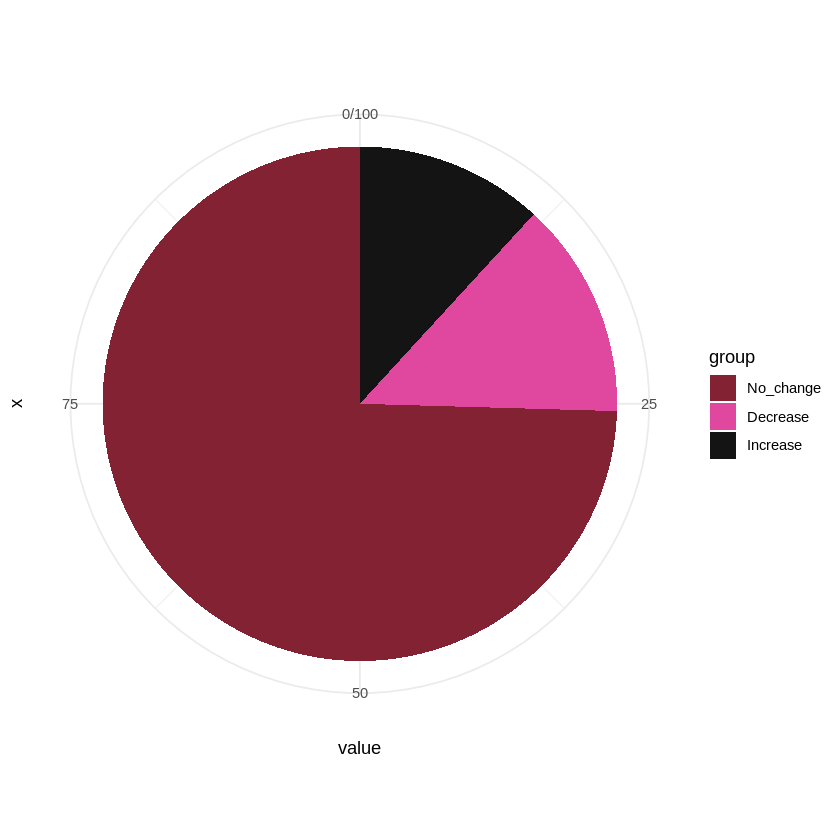

In [19]:
#male dimorphic gene
df <- data.frame(
  group = c("Increase", "Decrease", "No_change"),
  value = c(Increase, Decrease, No_change)
  )
df$group<-factor(df$group,levels=rev(c("Increase", "Decrease", "No_change")))
ggplot(df, aes(x="", y=value, fill=group))+
geom_bar(width = 1, stat = "identity")+ coord_polar("y", start=0)+
scale_fill_manual(values=rev(c("gray8","#E0479E", "#832232")))+
theme_minimal()
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/dimorphism/Esr1_3/Pie_chart_for_dimorphicp_volcano_P50vsEsr1KOF_male_dimorphic_gene.pdf",width=8,height=7)

In [20]:
Increase<-100*34/45
Decrease<-100*3/45
No_change<-100*(45-37)/45

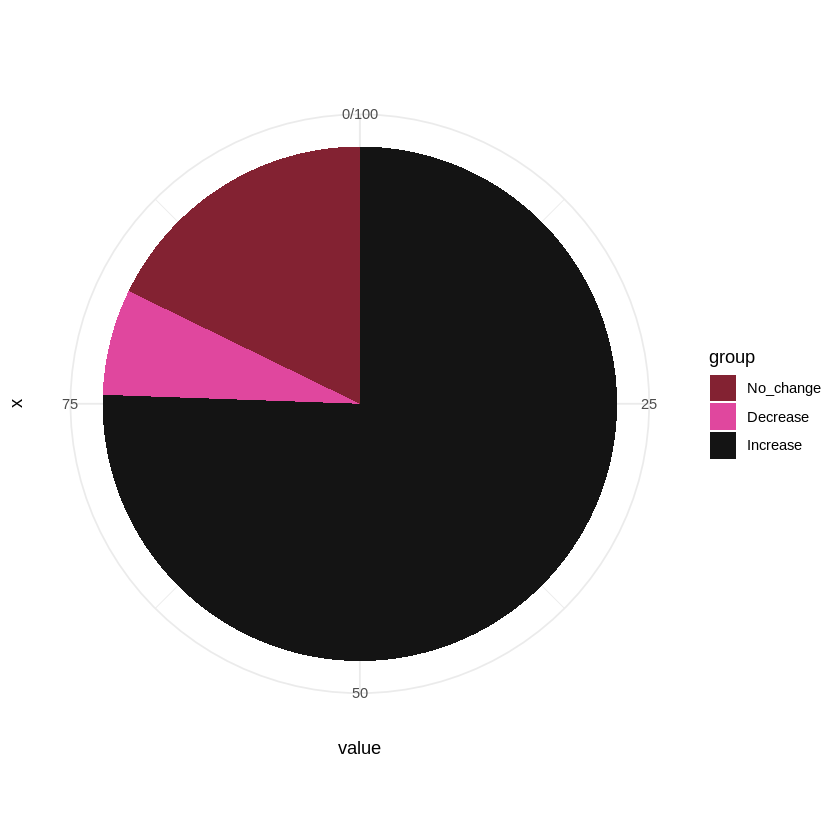

In [21]:
#female dimorphic gene
df <- data.frame(
  group = c("Increase", "Decrease", "No_change"),
  value = c(Increase, Decrease, No_change)
  )
df$group<-factor(df$group,levels=rev(c("Increase", "Decrease", "No_change")))
ggplot(df, aes(x="", y=value, fill=group))+
geom_bar(width = 1, stat = "identity")+ coord_polar("y", start=0)+
scale_fill_manual(values=rev(c("gray8","#E0479E", "#832232")))+
theme_minimal()
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/dimorphism/Esr1_3/Pie_chart_for_dimorphicp_volcano_P50vsEsr1KOF_female_dimorphic_gene.pdf",width=8,height=7)

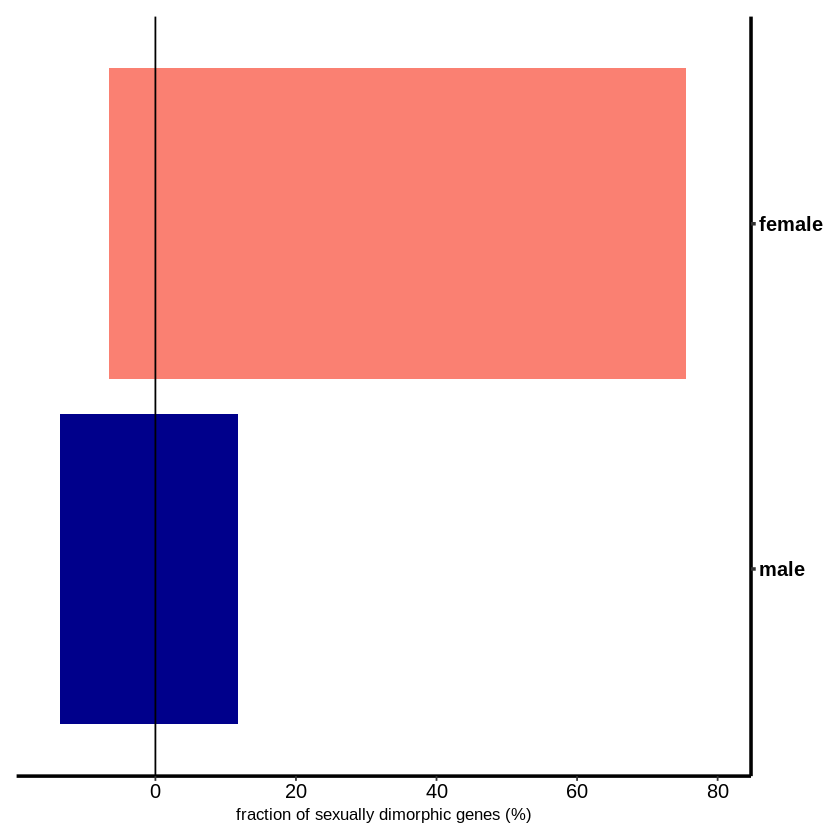

In [38]:
Increase_m<-100*13/110
Decrease_m<-100*15/110
Increase_f<-100*34/45
Decrease_f<-100*3/45

df <- data.frame(
  gene = c("female", "female","male","male"),
  fraction = c(Increase_f, -Decrease_f,Increase_m, -Decrease_m)
  )
df$gene<-factor(df$gene,levels=rev(c("female", "male")))
P<- ggplot(df, aes(x=gene, y=fraction,group=gene,fill=gene))+geom_bar(stat="identity")+ coord_flip()+scale_x_discrete(position = "top") +scale_fill_manual(values=c('darkblue','salmon'))+ylim(-15,80)+ geom_hline(yintercept=0, linetype="solid", color = "black")
P+theme(axis.title.y=element_blank(),
        ,axis.text.y=element_text(size=12,colour="black",face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),legend.position = "none",
panel.background = element_blank(),axis.text.x=element_text(size=12,angle = 0, hjust = 0.5,color="black"),axis.title.x=element_text(size=10), axis.line = element_line(colour = "black",size=1),axis.ticks.length=unit(.1, "cm"),  axis.ticks.y = element_line(size=1) , plot.margin = margin(10, 10, 10, 10))+ylab("fraction of sexually dimorphic genes (%)")
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/dimorphism/Esr1_3/bar_for_dimorphicp_volcano_P50vsEsr1KOF_male_and_female_dimorphic_gene.pdf",height=4, width=10 , paper = "letter")

